**Table of Contents** <br>

* [1. Import](#import)
     * [1.1 Import libraries](#libraries)<br>
     * [1.2 Import the dataset](#dataset)<br>
 
* [2. Data Exploration](#exploration)<br>
    * [2.1 Coeherence Check](#coeherence)<br>
    * [2.2 Outliers](#outliers)<br>   
        * [2.2.1 Manual Filter](#manual)<br>
        * [2.2.2 IQR method](#iqr)<br>
        * [2.2.3 DSBN](#DSBN)<br>
        * [2.2.4 Multi-dimentional outliers](#multi-outliers)<br>

    * [2.3 Scale the data](#scale1)<br>
    * [2.4 Missing Values](#missings)<br>
         * [2.4.1 Mode](#mode_missing)<br>    
         * [2.4.2 KNN](#KNN_missing)<br>
         * [2.4.3 Logistic Regression](#logistic_missing)<br>

    * [2.5 Feature Engineering](#eng)<br>
    * [2.6 Redo scaling the data](#scale2)<br>
    * [2.7 Feature Selection](#feat-selection)<br>
    * [2.8 Redo outliers check](#redo-out)<br>

* [3 Clustering Algorithms](#Clustering)<br>
    * [3.1 K-prototypes](#prototypes)<br>
    * [3.2 K-means + hierarquical clustering](#k_means)<br>
  

</div>

In [1]:
# FAZER codigo:
# outliers
# merging perspetivas
# reduzir o numero de clusters
# graficos - interpretacao clusters
# decision tree para por os outliers

In [2]:
# abstract DANIEL
# intro DANIEL
# prototypes -helena
# hirarquical 
# cluster metric features
# conclusions DANIEL

<div class="alert alert-block alert-success">

<a class="anchor" id="import">    </a>
# Import
       
</div>



In [3]:
#!pip install imblearn
#!pip install kmodes

<a class="anchor" id="libraries">

## Import libraries
    
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport
import os

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,confusion_matrix,recall_score,accuracy_score,precision_score,f1_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from collections import Counter

# for better resolution plots
%config InlineBackend.figure_format = 'retina'
sns.set_style("white")

In [2]:
import pyreadstat

<a class="anchor" id="dataset">

## Import the dataset
    
</a>

In [3]:
data, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

<div class="alert alert-block alert-success">
<a class="anchor" id="exploration">

# Data Exploration
    
</a>

In [4]:
# DM_profiling_report = ProfileReport(data, title="DM Pandas Profiling Report", explorative=True)
# DM_profiling_report.to_notebook_iframe()

In [5]:
#DM_profiling_report.to_file("DM_profiling_report.html")

In [6]:
data

CustID  FirstPolYear  BirthYear          EducDeg  MonthSal  \
0          1.0        1985.0     1982.0  2 - High School    2177.0   
1          2.0        1981.0     1995.0  2 - High School     677.0   
2          3.0        1991.0     1970.0        1 - Basic    2277.0   
3          4.0        1990.0     1981.0      3 - BSc/MSc    1099.0   
4          5.0        1986.0     1973.0      3 - BSc/MSc    1763.0   
...        ...           ...        ...              ...       ...   
10291  10292.0        1984.0     1949.0          4 - PhD    3188.0   
10292  10293.0        1977.0     1952.0        1 - Basic    2431.0   
10293  10294.0        1994.0     1976.0      3 - BSc/MSc    2918.0   
10294  10295.0        1981.0     1977.0        1 - Basic    1971.0   
10295  10296.0        1990.0     1981.0          4 - PhD    2815.0   

       GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
0             1.0       1.0      380.97        0.39     375.85          79.45   
1             4.0       1.0     -131.13        1.12      77.46         416.20   
2             3.0       0.0      504.67        0.28     206.15         224.50   
3             4.0       1.0      -16.99        0.99     182.48          43.35   
4             4.0       1.0       35.23        0.90     338.62          47.80   
...           ...       ...         ...         ...        ...            ...   
10291         2.0       0.0       -0.11        0.96     393.74          49.45   
10292         3.0       0.0     1405.60        0.00     133.58        1035.75   
10293         1.0       1.0      524.10        0.21     403.63         132.80   
10294         2.0       1.0      250.05        0.65     188.59         211.15   
10295         1.0       1.0      463.75        0.27     414.08          94.45   

       PremHealth  PremLife  PremWork  
0          146.36     47.01     16.89  
1          116.69    194.48    106.13  
2          124.58     86.35     99.02  
3          311.17     35.34     28.34  
4          182.59     18.78     41.45  
...           ...       ...       ...  
10291      173.81      9.78     14.78  
10292      143.25     12.89    105.13  
10293      142.25     12.67      4.89  
10294      198.37     63.90    112.91  
10295      141.25      6.89     12.89  

[10296 rows x 14 columns]

In [7]:
data.set_index('CustID',inplace=True)

In [8]:
data.describe().T

count         mean          std        min      25%      50%  \
FirstPolYear   10266.0  1991.062634   511.267913    1974.00  1980.00  1986.00   
BirthYear      10279.0  1968.007783    19.709476    1028.00  1953.00  1968.00   
MonthSal       10260.0  2506.667057  1157.449634     333.00  1706.00  2501.50   
GeoLivArea     10295.0     2.709859     1.266291       1.00     1.00     3.00   
Children       10275.0     0.706764     0.455268       0.00     0.00     1.00   
CustMonVal     10296.0   177.892605  1945.811505 -165680.42    -9.44   186.87   
ClaimsRate     10296.0     0.742772     2.916964       0.00     0.39     0.72   
PremMotor      10262.0   300.470252   211.914997      -4.11   190.59   298.61   
PremHousehold  10296.0   210.431192   352.595984     -75.00    49.45   132.80   
PremHealth     10253.0   171.580833   296.405976      -2.11   111.80   162.81   
PremLife       10192.0    41.855782    47.480632      -7.00     9.89    25.56   
PremWork       10210.0    41.277514    51.513572     -12.00    10.67    25.67   

                     75%       max  
FirstPolYear   1992.0000  53784.00  
BirthYear      1983.0000   2001.00  
MonthSal       3290.2500  55215.00  
GeoLivArea        4.0000      4.00  
Children          1.0000      1.00  
CustMonVal      399.7775  11875.89  
ClaimsRate        0.9800    256.20  
PremMotor       408.3000  11604.42  
PremHousehold   290.0500  25048.80  
PremHealth      219.8200  28272.00  
PremLife         57.7900    398.30  
PremWork         56.7900   1988.70

In [9]:
data[data['EducDeg']==''].sample()

FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                    
3057.0           NaN     1977.0            2221.0         1.0       1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
3057.0       -9.22        0.97     475.09           15.0       93.35   

        PremLife  PremWork  
CustID                      
3057.0     15.78      2.78

In [10]:
# replace "" by nans
maybe_nan=['_','',' ','  ','/','%']
data.replace(maybe_nan, np.nan, inplace=True)

# count of missing values
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [11]:
data.insert(4,'EducDeg_cat',data['EducDeg'].str[4:])

In [12]:
data.insert(4,'EducDeg_ord',data['EducDeg'].str[0])

In [13]:
data.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
EducDeg_ord       object
EducDeg_cat       object
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [14]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [15]:
# pd.Int32Dtype() due to nan values
data['FirstPolYear']=data['FirstPolYear'].astype(pd.Int32Dtype())
data['BirthYear']=data['BirthYear'].astype(pd.Int32Dtype())
data['Children']=data['Children'].astype(pd.Int32Dtype())
data['GeoLivArea']=data['GeoLivArea'].astype(pd.Int32Dtype())
data['CustMonVal']=data['CustMonVal'].astype(pd.Float32Dtype())
data['ClaimsRate']=data['ClaimsRate'].astype(pd.Float32Dtype())
data['PremMotor']=data['PremMotor'].astype(pd.Float32Dtype())
data['PremHousehold']=data['PremHousehold'].astype(pd.Float32Dtype())
data['PremHealth']=data['PremHealth'].astype(pd.Float32Dtype())
data['PremLife']=data['PremLife'].astype(pd.Float32Dtype())
data['PremWork']=data['PremWork'].astype(pd.Float32Dtype())

data['EducDeg_cat']=data['EducDeg_cat'].astype(pd.StringDtype())

data['EducDeg_ord'] = data['EducDeg_ord'].astype('float').astype('Int32')


In [16]:
data.dtypes

FirstPolYear       Int32
BirthYear          Int32
EducDeg           object
MonthSal         float64
EducDeg_ord        Int32
EducDeg_cat       string
GeoLivArea         Int32
Children           Int32
CustMonVal       Float32
ClaimsRate       Float32
PremMotor        Float32
PremHousehold    Float32
PremHealth       Float32
PremLife         Float32
PremWork         Float32
dtype: object

In [17]:
# Check for duplicated rows -- 3 duplicates
data[data.duplicated()]#.sum()
# dropping all duplicates
data.drop_duplicates(inplace=True)

In [18]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [19]:
data_treat=data.copy()

In [20]:
data_treat

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10293 rows x 15 columns]

<a class="anchor" id="coeherence">

## Coeherence Check
    
</a>

In [21]:
# checking if the correspondance is done well
data_treat[
          ((data_treat['EducDeg_cat']=='PhD') & (data_treat['EducDeg_ord']==4))|
          ((data_treat['EducDeg_cat']=='Basic') & (data_treat['EducDeg_ord']==1))|
          ((data_treat['EducDeg_cat']=='High School') & (data_treat['EducDeg_ord']==2))|
          ((data_treat['EducDeg_cat']=='BSc/MSc') & (data_treat['EducDeg_ord']==3))]

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10276 rows x 15 columns]

In [22]:
# the missing records are due to nan, therefore there are no inconsistenses associated with EducDeg_cat and EducDeg_ord
10293-10276

17

In [23]:
data_treat.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [24]:
data_treat[(data_treat['FirstPolYear']<data_treat['BirthYear'])]

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
2.0              1981       1995  2 - High School     677.0            2   
14.0             1983       2000        1 - Basic    1043.0            1   
19.0             1981       1982        1 - Basic    1414.0            1   
23.0             1976       1986  2 - High School    1495.0            2   
41.0             1994       1995  2 - High School    1177.0            2   
...               ...        ...              ...       ...          ...   
10269.0          1987       1988      3 - BSc/MSc    1414.0            3   
10274.0          1989       1992  2 - High School    1035.0            2   
10285.0          1980       1987      3 - BSc/MSc    1504.0            3   
10289.0          1982       1993  2 - High School    1465.0            2   
10291.0          1994       1999        1 - Basic     626.0            1   

         EducDeg_cat  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                               
2.0      High School           4         1 -131.130005        1.12   
14.0           Basic           3         1  -75.120003        1.06   
19.0           Basic           3         1  230.380005        0.71   
23.0     High School           1         1  -89.790001        1.08   
41.0     High School           4         1  121.360001        0.84   
...              ...         ...       ...         ...         ...   
10269.0      BSc/MSc           3         1   50.459999         0.9   
10274.0  High School           1         1   293.51001        0.58   
10285.0      BSc/MSc           4         1       -1.55        0.96   
10289.0  High School           1         1  795.150024        0.35   
10291.0        Basic           3         1  176.259995        0.85   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
14.0          44.34     342.850006  127.690002  267.940002   94.459999  
19.0     313.170013     373.399994  121.800003       14.78       72.57  
23.0     209.039993     308.950012  192.479996   64.790001   54.900002  
41.0      52.009998     455.649994  135.470001  146.360001  148.029999  
...             ...            ...         ...         ...         ...  
10269.0  129.580002     167.800003  184.479996  165.919998   75.459999  
10274.0  235.710007     195.600006  103.129997  170.919998   58.119999  
10285.0  390.630005      29.450001  179.699997        -6.0        <NA>  
10289.0   67.790001     820.150024  102.129997  182.479996   86.459999  
10291.0        6.89          878.5  103.129997  113.019997  201.259995  

[1997 rows x 15 columns]

In [25]:
data_treat=data_treat.drop(columns=['BirthYear'],axis=1)

In [26]:
#isnull() to preserve the nan values

data_treat=data_treat[
#                      ((data_treat['BirthYear']<=2016) | (data_treat['BirthYear'].isnull()))&
#                      ((data_treat['BirthYear']>=2016-120)|(data_treat['BirthYear'].isnull()))&
                     ((data_treat['FirstPolYear']<=2016) | (data_treat['FirstPolYear'].isnull()))&
                     ((data_treat['FirstPolYear']>=2016-120)|(data_treat['FirstPolYear'].isnull()))&
#                     ((data_treat['FirstPolYear']>=data_treat['BirthYear'])|(data_treat['FirstPolYear'].isnull())|(data_treat['BirthYear'].isnull()))&

#                     ((((data_treat['PremMotor']>0) & (data_treat['BirthYear']>=(2016-16)))|(data_treat['PremMotor'].isnull()))|
#                      (((data_treat['PremWork']>0) & (data_treat['BirthYear']>=(2016-16)))|(data_treat['PremMotor'].isnull()))|
#                      (((data_treat['PremHousehold']>0) & (data['BirthYear']>=(2016-16)))|(data_treat['BirthYear'].isnull()))|

#                      (((data_treat['Children']==1) & (data_treat['BirthYear']<=(2016-11)))|(data_treat['BirthYear'].isnull())|(data_treat['Children'].isnull()))|
#                     (((data_treat['EducDeg']=='4 - PhD') & (data_treat['BirthYear']<=(2016-13)))|(data_treat['BirthYear'].isnull())|(data_treat['EducDeg'].isnull()))| 
                     ((((data_treat['EducDeg_cat']=='PhD') & (data_treat['EducDeg_ord']==4)) |(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='Basic') & (data_treat['EducDeg_ord']==1))|(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='High School') & (data_treat['EducDeg_ord']==2))|(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='BSc/MSc') & (data_treat['EducDeg_ord']==3))|(data_treat['EducDeg_cat'].isnull())))
      ]

In [27]:
data_treat

FirstPolYear          EducDeg  MonthSal  EducDeg_ord  EducDeg_cat  \
CustID                                                                       
1.0              1985  2 - High School    2177.0            2  High School   
2.0              1981  2 - High School     677.0            2  High School   
3.0              1991        1 - Basic    2277.0            1        Basic   
4.0              1990      3 - BSc/MSc    1099.0            3      BSc/MSc   
5.0              1986      3 - BSc/MSc    1763.0            3      BSc/MSc   
...               ...              ...       ...          ...          ...   
10292.0          1984          4 - PhD    3188.0            4          PhD   
10293.0          1977        1 - Basic    2431.0            1        Basic   
10294.0          1994      3 - BSc/MSc    2918.0            3      BSc/MSc   
10295.0          1981        1 - Basic    1971.0            1        Basic   
10296.0          1990          4 - PhD    2815.0            4          PhD   

         GeoLivArea  Children   CustMonVal  ClaimsRate   PremMotor  \
CustID                                                               
1.0               1         1   380.970001        0.39  375.850006   
2.0               4         1  -131.130005        1.12   77.459999   
3.0               3         0   504.670013        0.28  206.149994   
4.0               4         1       -16.99        0.99  182.479996   
5.0               4         1        35.23         0.9  338.619995   
...             ...       ...          ...         ...         ...   
10292.0           2         0        -0.11        0.96   393.73999   
10293.0           3         0  1405.599976         0.0  133.580002   
10294.0           1         1   524.099976        0.21  403.630005   
10295.0           2         1   250.050003        0.65  188.589996   
10296.0           1         1       463.75        0.27  414.079987   

         PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                      
1.0          79.449997  146.360001   47.009998   16.889999  
2.0         416.200012  116.690002  194.479996  106.129997  
3.0              224.5  124.580002   86.349998   99.019997  
4.0          43.349998  311.170013       35.34       28.34  
5.0          47.799999  182.589996   18.780001   41.450001  
...                ...         ...         ...         ...  
10292.0      49.450001  173.809998        9.78       14.78  
10293.0        1035.75      143.25       12.89  105.129997  
10294.0     132.800003      142.25       12.67        4.89  
10295.0     211.149994  198.369995   63.900002  112.910004  
10296.0      94.449997      141.25        6.89       12.89  

[10292 rows x 14 columns]

In [28]:
# percentage of inconsistent records
(1-(len(data_treat)/len(data)))*100

0.009715340522686855

In [29]:
data_consist=data_treat.copy()

In [30]:
data_consist.isna().sum()

FirstPolYear      30
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [31]:
# redundant variables
data_consist.drop(['EducDeg_cat', 'EducDeg'], axis=1, inplace=True)

In [32]:
data_consist.sample()

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  CustMonVal  \
CustID                                                                          
8343.0          1982    4029.0            2           1         0      -86.68   

        ClaimsRate   PremMotor  PremHousehold  PremHealth   PremLife  PremWork  
CustID                                                                          
8343.0        1.08  187.589996     240.050003  284.720001  46.119999     15.56

<a class="anchor" id="outliers">

## Outliers
    
</a>

In [33]:
non_metric_features = ["Children","EducDeg_ord",'GeoLivArea']
metric_features = data_consist.columns.drop(non_metric_features).to_list()
metric_features

['FirstPolYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

Text(0.5, 0.98, "Numeric Variables' Histograms")

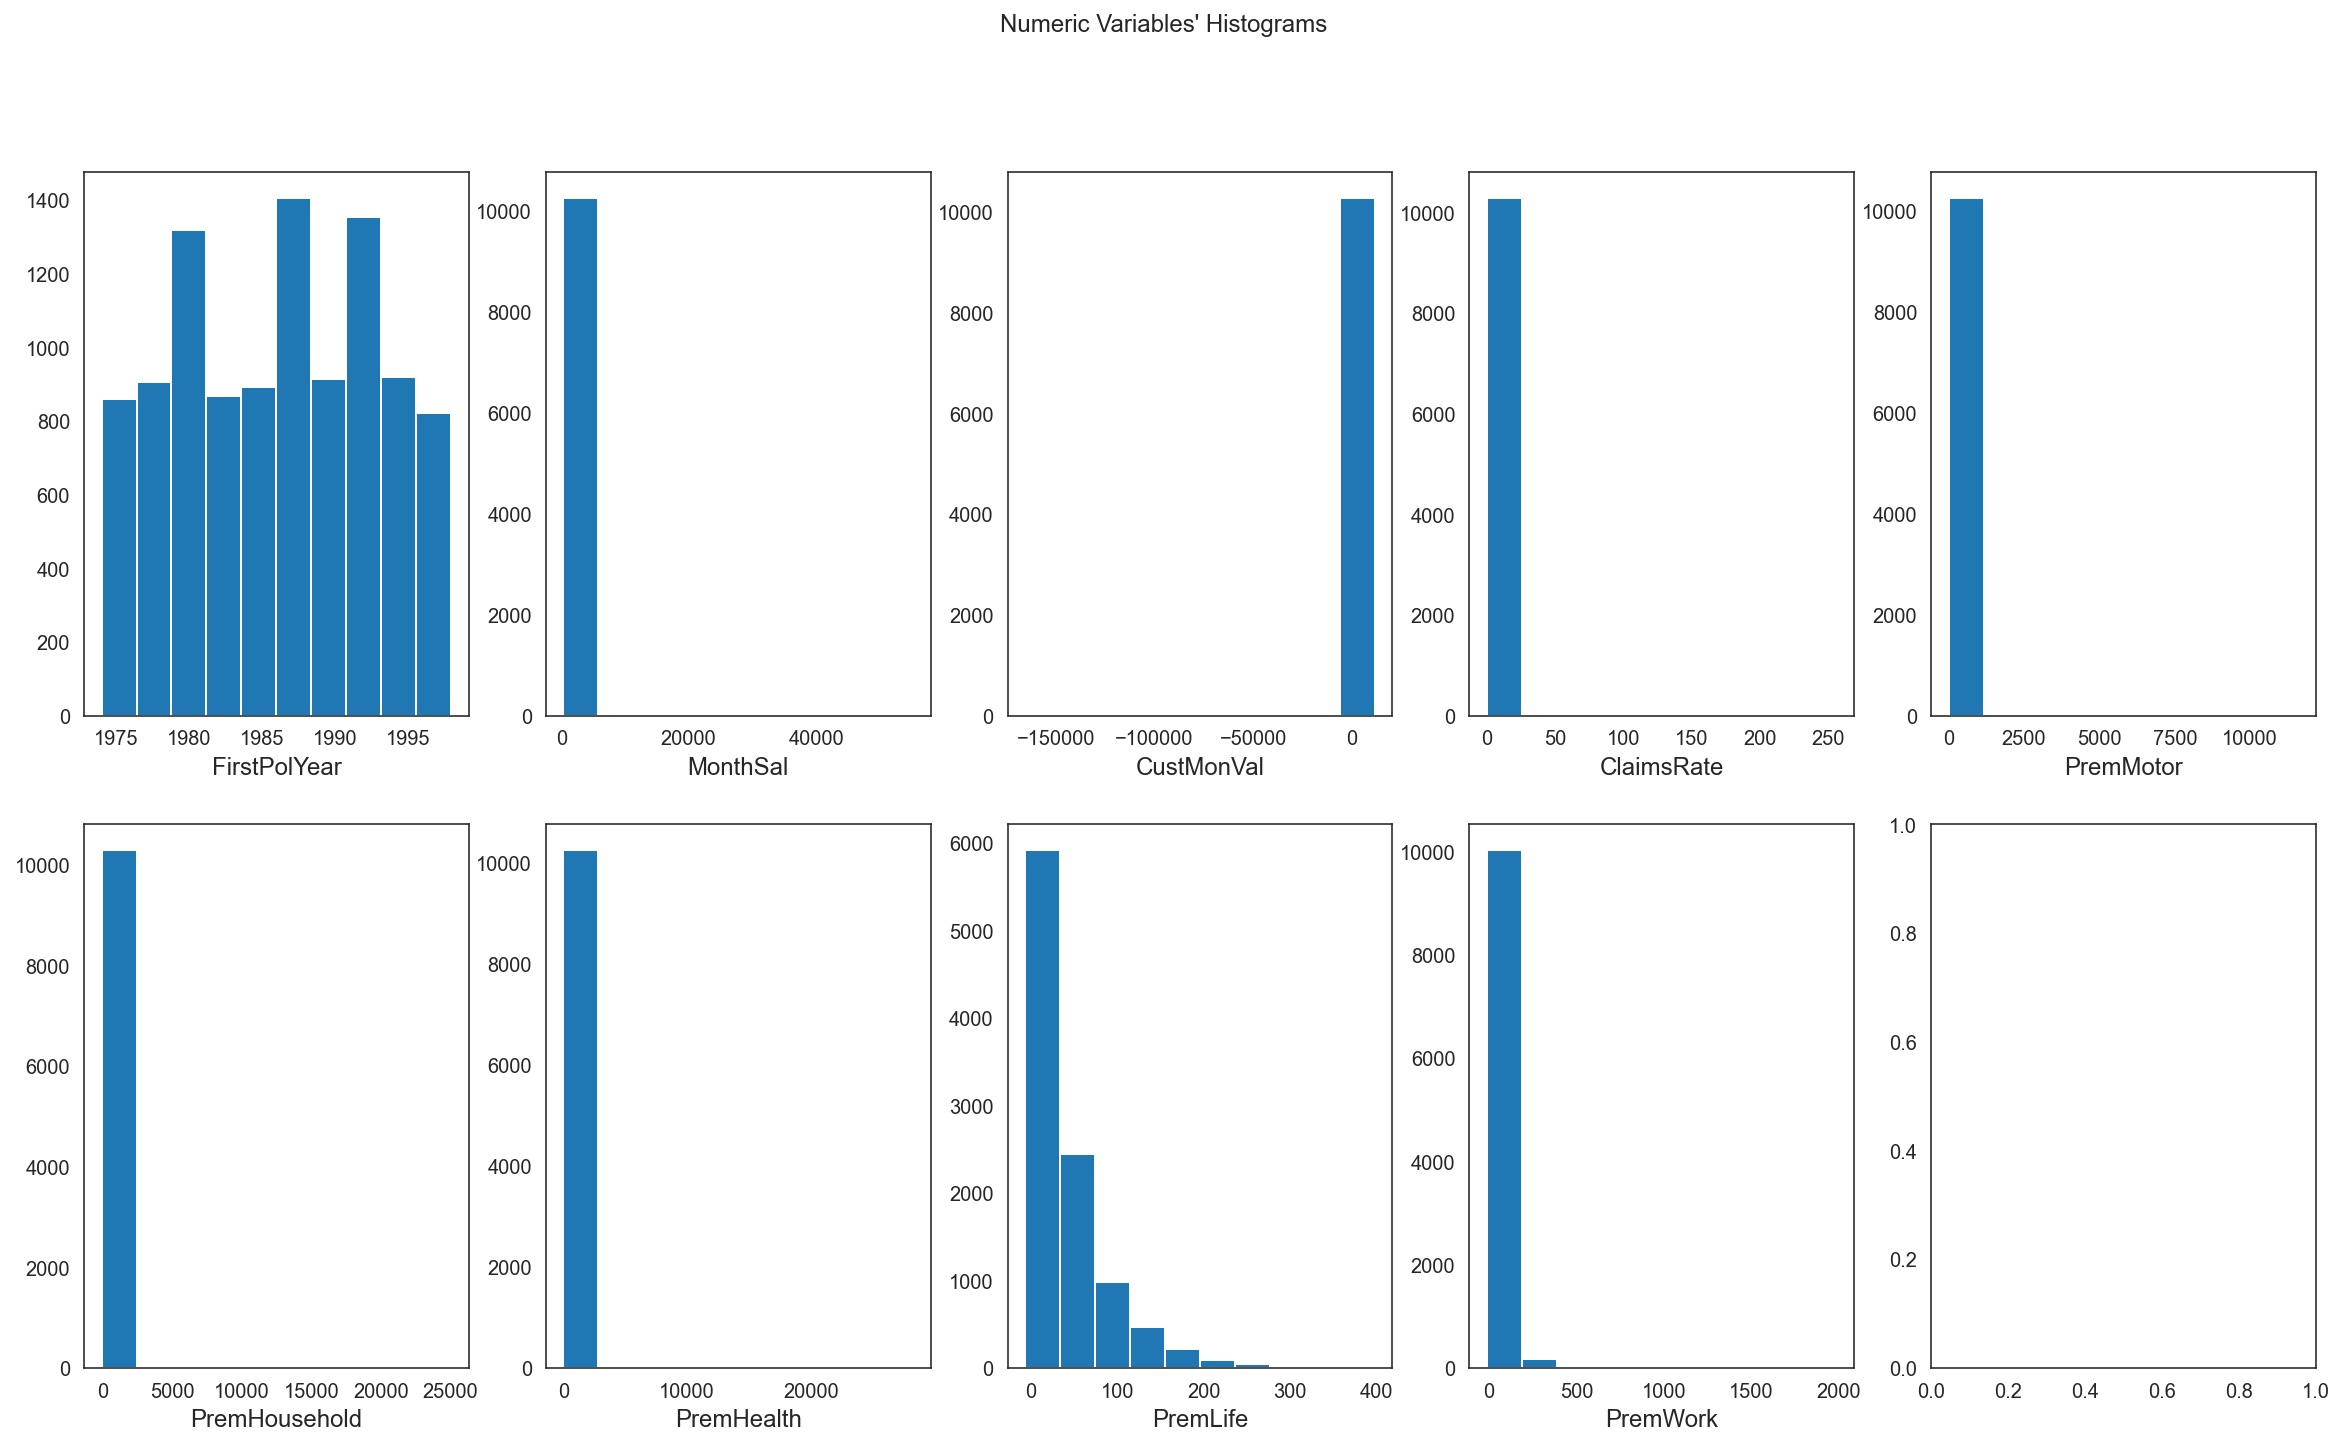

In [34]:
%matplotlib inline

sns.set_style("white")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data_consist[feat][~np.isnan(data_consist[feat])], bins=10)  
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

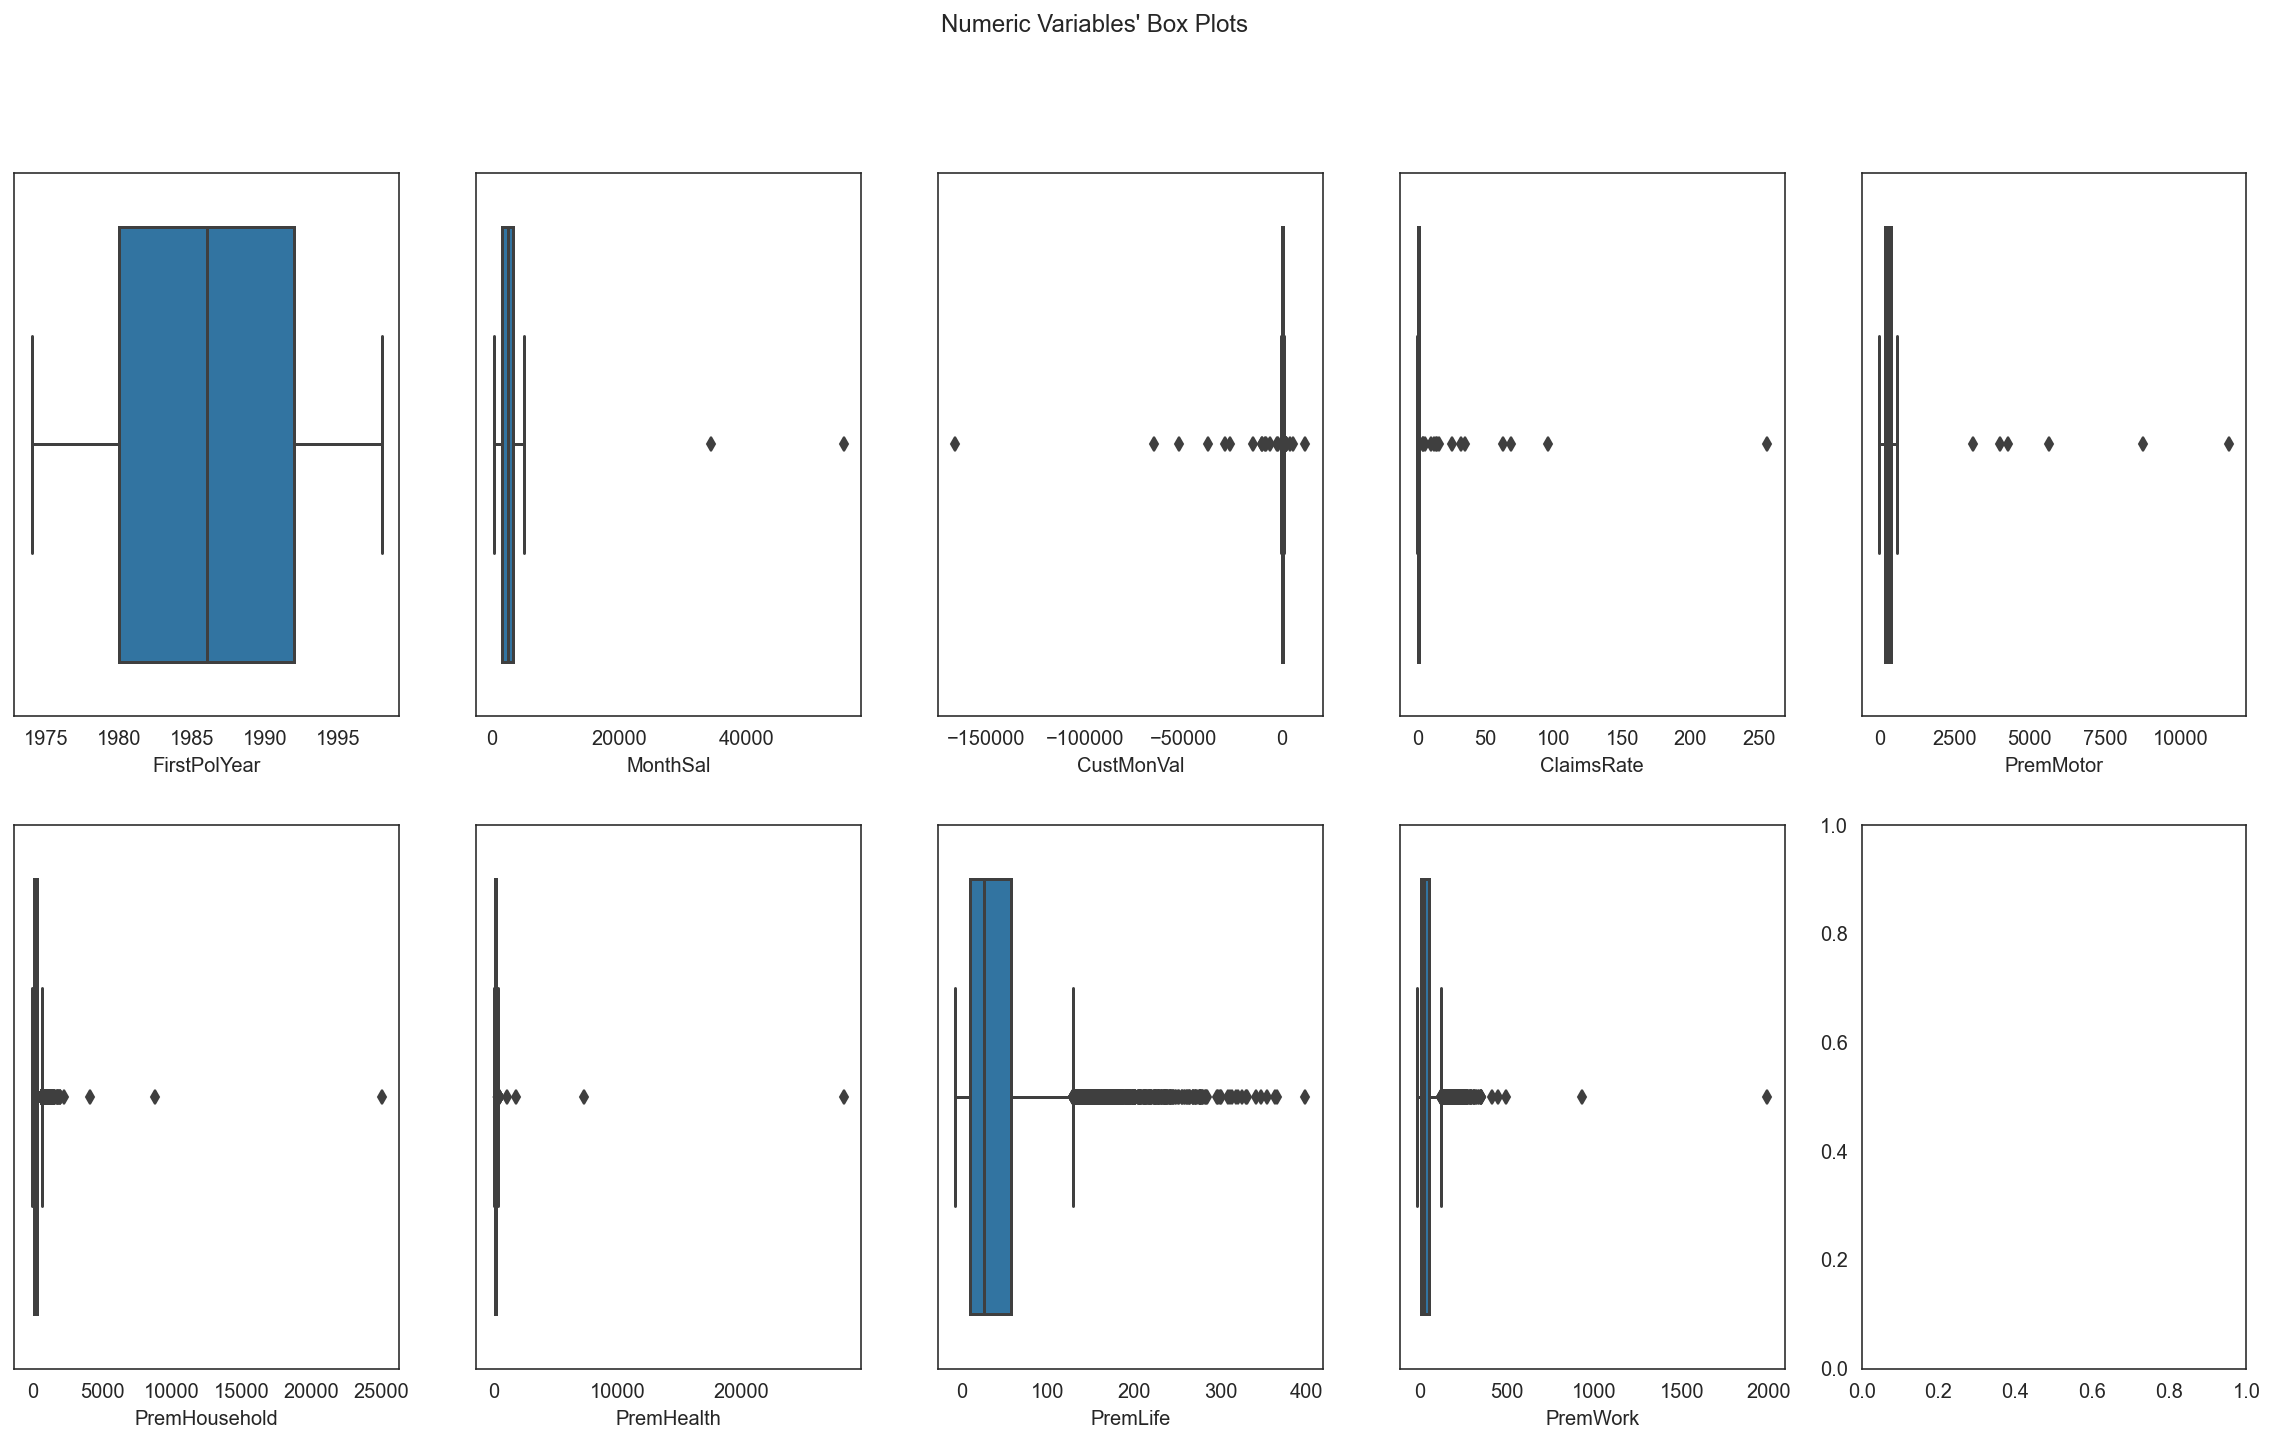

In [35]:
# All Numeric Variables' Box Plots in one figure
sns.set_style("white")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_consist[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join('..\DataMining_project_master.git/figures', 'box_plot_with_out'), dpi=200)
plt.show()


<a class="anchor" id="manual">

### Manual Filter
    
</a>

In [36]:
data_consist

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0          1984    3188.0            4           2         0   
10293.0          1977    2431.0            1           3         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
2.0      -131.130005        1.12   77.459999     416.200012  116.690002   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  
CustID                           
1.0       47.009998   16.889999  
2.0      194.479996  106.129997  
3.0       86.349998   99.019997  
4.0           35.34       28.34  
5.0       18.780001   41.450001  
...             ...         ...  
10292.0        9.78       14.78  
10293.0       12.89  105.129997  
10294.0       12.67        4.89  
10295.0   63.900002  112.910004  
10296.0        6.89       12.89  

[10292 rows x 12 columns]

In [37]:

filters1 = (
    
    ((data_consist['MonthSal']<=10000) | (data_consist['MonthSal'].isnull()))
    &
    ((data_consist['CustMonVal']>=-1250) | (data_consist['CustMonVal'].isnull()))
    &
    ((data_consist['CustMonVal']<1500) | (data_consist['CustMonVal'].isnull()))
    &
    ((data_consist['ClaimsRate']<=4)| (data_consist['ClaimsRate'].isnull()))
    &
    ((data_consist['PremMotor']<=2000)| (data_consist['PremMotor'].isnull()))
    &
    ((data_consist['PremHousehold']<=1600)| (data_consist['PremHousehold'].isnull()))
    &
    ((data_consist['PremHealth']<=800)| (data_consist['PremHealth'].isnull()))
    &
    ((data_consist['PremLife']<=200)| (data_consist['PremLife'].isnull()))
    &
    ((data_consist['PremWork']<=400)| (data_consist['PremWork'].isnull()))   
    
)

data_1=data_consist[filters1]

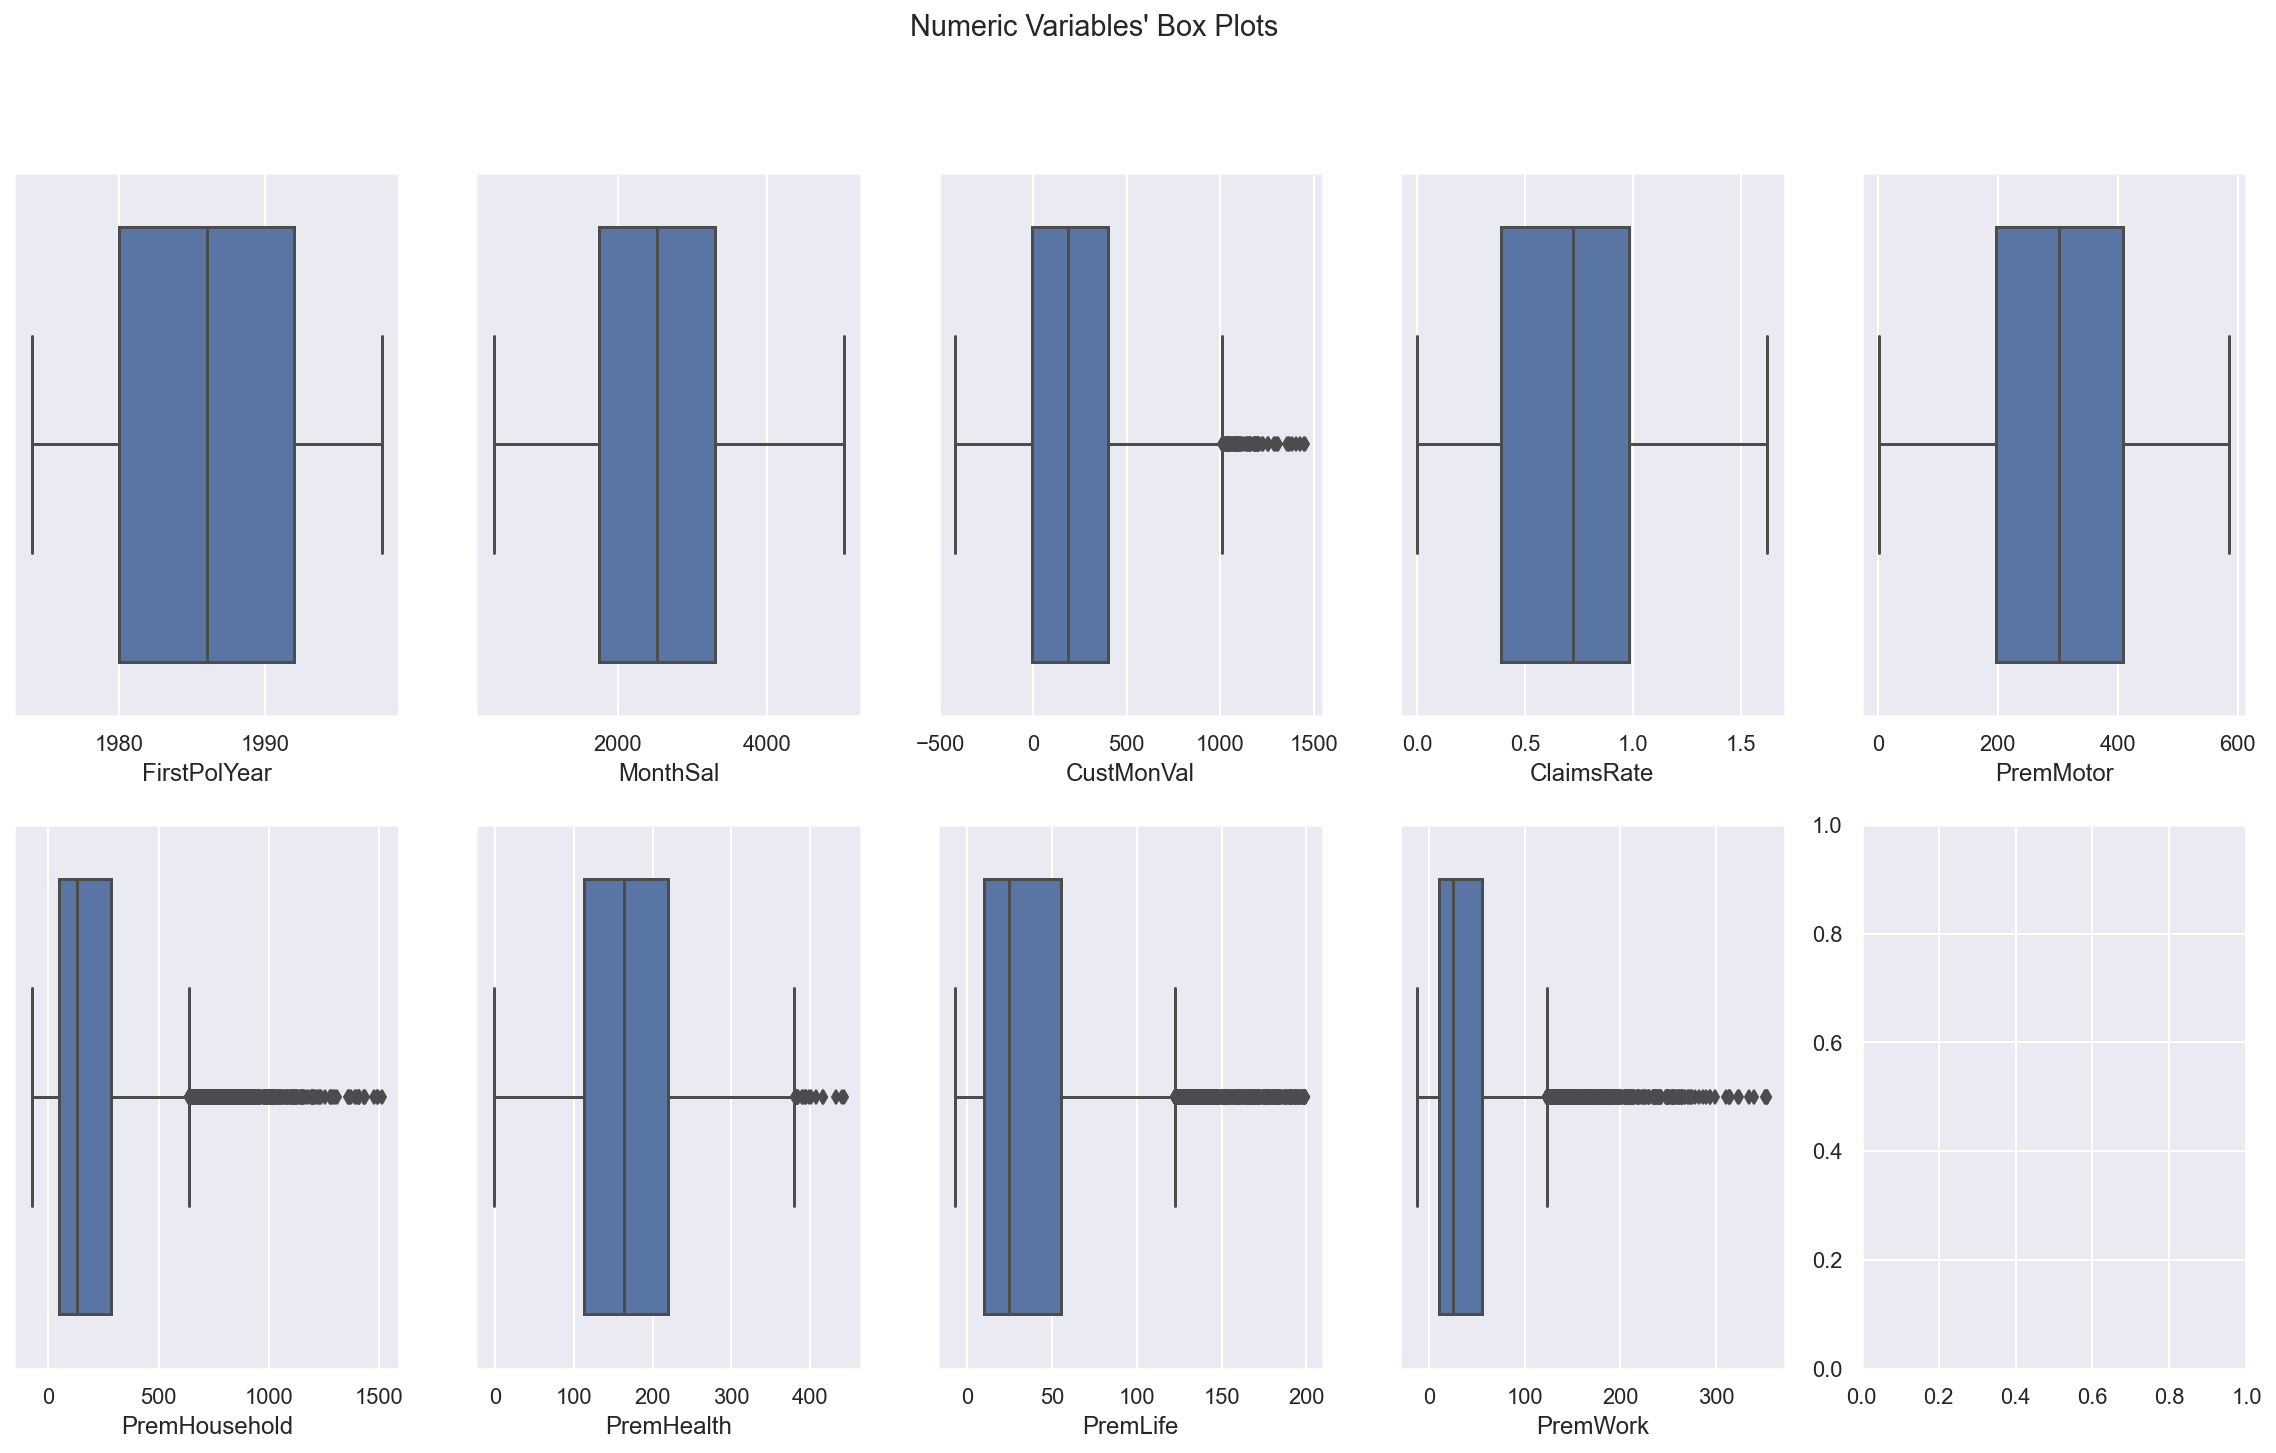

In [38]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_1[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join('..\DataMining_project_master.git/figures', 'boxplots_without_out'), dpi=200)
plt.show()

In [39]:
print('Percentage of outliers removed:', (1-np.round((data_1.shape[0] / data_consist.shape[0]), 4))*100)

Percentage of outliers removed: 1.880000000000004


Text(0.5, 0.98, "Numeric Variables' Histograms")

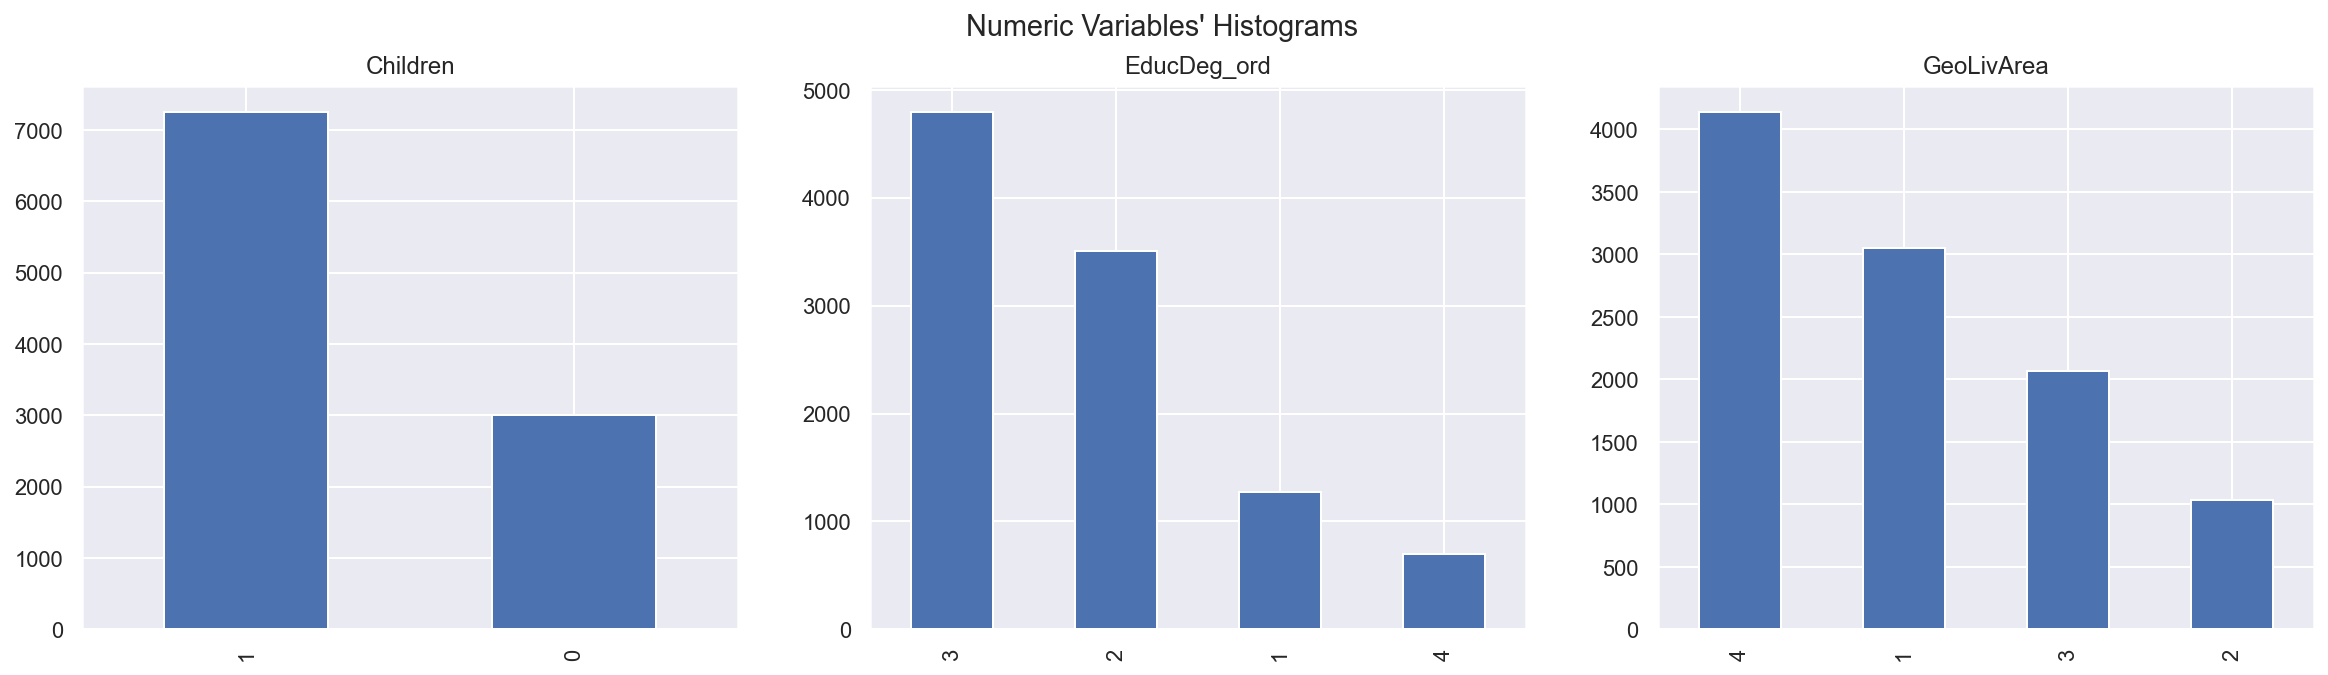

In [40]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, ax = plt.subplots(1, len(non_metric_features),figsize=(20, 5))

for i, categorical_feature in enumerate(data[non_metric_features]):
    data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

In [41]:
data_consist.isna().sum()

FirstPolYear      30
MonthSal          36
EducDeg_ord       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

<a class="anchor" id="iqr">

### IQR Method
    
</a>

In [42]:
# def drop_outliers_IQR(df, iqr_mult,  metric_features):
#     filters2 = []
    
#     for metric in metric_features:
    
#         q25 = df[metric].quantile(.25)
#         q75 = df[metric].quantile(.75)
#         iqr = (q75 - q25)
#         upper_lim = q75 + (iqr_mult * iqr)
#         lower_lim = q25 - (iqr_mult * iqr)
#         filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))

#     filters2 = pd.Series(np.all(filters2, 0), index=df.index)
#     data_2 = df[filters2]
   

#     return data_2

In [43]:
# drop_outliers_IQR(data_consist[metric_features][~np.isnan(data_consist['PremHousehold'])], 4 , ['PremHousehold'])

In [44]:
outliers = data_consist[~filters1]

In [45]:
data_consist=data_consist[filters1]

In [46]:
data_consist

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0          1984    3188.0            4           2         0   
10293.0          1977    2431.0            1           3         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
2.0      -131.130005        1.12   77.459999     416.200012  116.690002   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  
CustID                           
1.0       47.009998   16.889999  
2.0      194.479996  106.129997  
3.0       86.349998   99.019997  
4.0           35.34       28.34  
5.0       18.780001   41.450001  
...             ...         ...  
10292.0        9.78       14.78  
10293.0       12.89  105.129997  
10294.0       12.67        4.89  
10295.0   63.900002  112.910004  
10296.0        6.89       12.89  

[10099 rows x 12 columns]


<a class="anchor" id="DBSCAN">

### DBSCAN
    
</a>


In [47]:
data_consist1=data_consist[~data_consist.isna().any(axis=1)]

In [48]:
neigh = NearestNeighbors(n_neighbors = 20)
nbrs = neigh.fit(data_consist1[metric_features])
distances, indices = nbrs.kneighbors(data_consist1[metric_features])
distances

array([[  0.        ,  49.8129387 ,  55.39123307, ...,  98.21419954,
         99.63382104,  99.86471103],
       [  0.        , 163.81056701, 176.22160044, ..., 258.72137003,
        262.96477827, 263.37639811],
       [  0.        , 127.68280324, 153.5459063 , ..., 201.49915037,
        202.04476988, 202.22660819],
       ...,
       [  0.        ,  48.5478726 ,  51.91696587, ..., 101.62859263,
        102.51288275, 104.82203129],
       [  0.        , 101.86842263, 110.39787736, ..., 145.05676802,
        150.01422072, 150.10621703],
       [  0.        ,  37.81051196,  41.47668562, ...,  83.25916476,
         83.63186623,  84.28501946]])

[ 54.63612393  56.84024953  57.40574855 ... 699.12976639 720.58127038
 819.26065819]


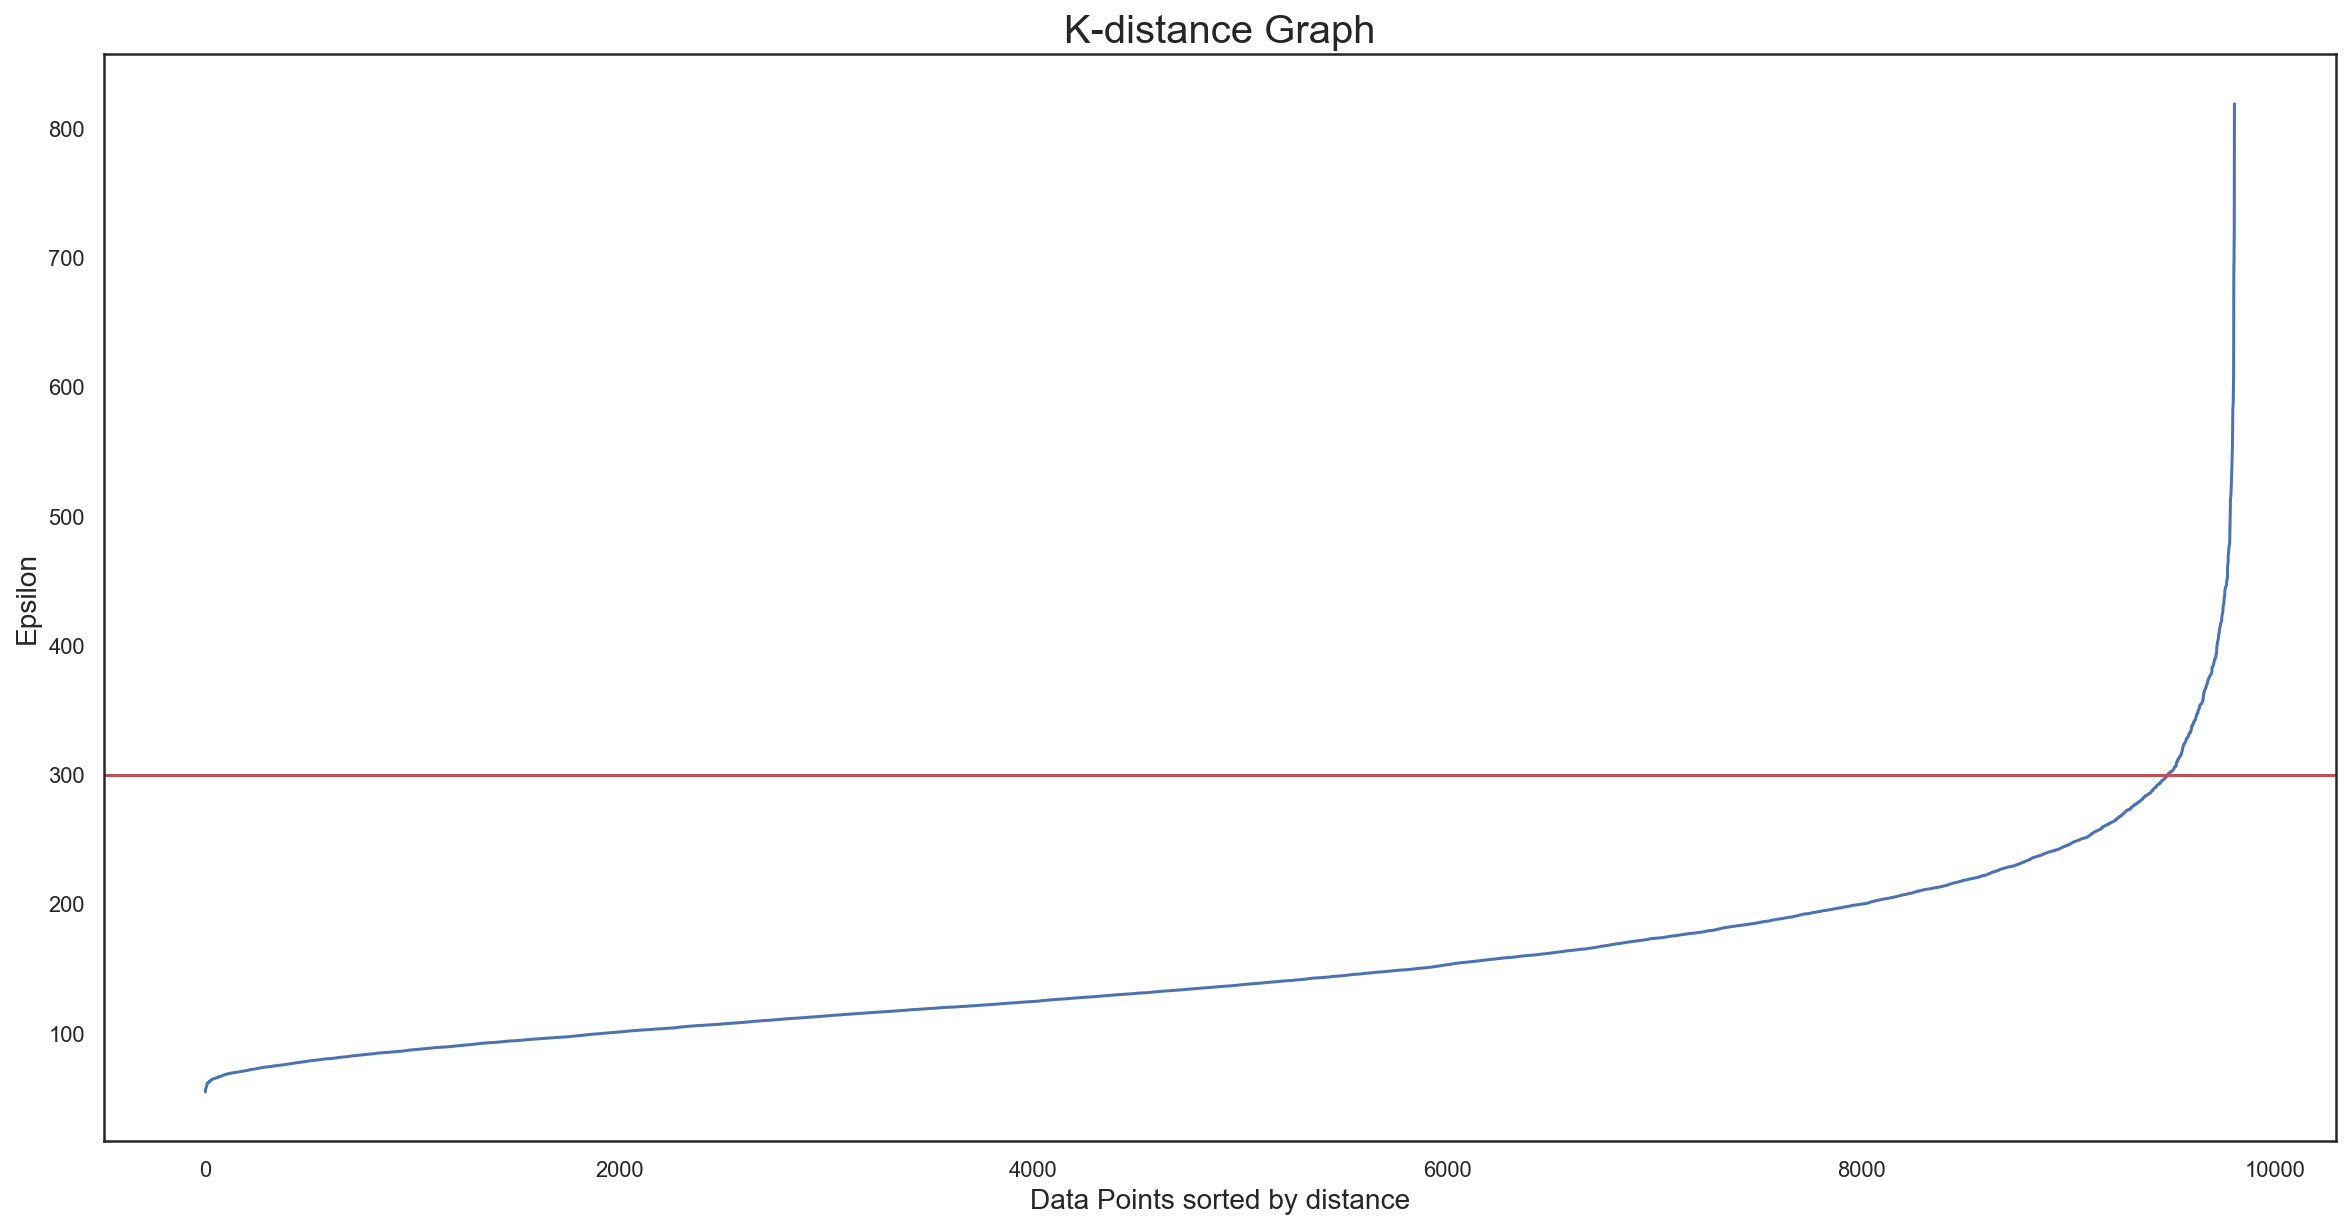

In [49]:
%matplotlib inline
sns.set_style("white")
distances1 =  np.sort(distances[:, -1])
print(distances1)
plt.figure(figsize=(20,10))
plt.plot(distances1)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.axhline(y=300, color='r', linestyle='-')
# plt.xlim([8000, 11000])
# plt.ylim([0, 2500])
plt.show()

In [50]:
dbscan_opt = DBSCAN(eps = 300, min_samples=18,n_jobs=-1)
dbscan_labels=dbscan_opt.fit_predict(data_consist1[metric_features])

In [51]:
data_dbscan = data_consist1[metric_features].copy()
data_dbscan['DBSCAN_opt_labels'] = dbscan_opt.labels_
data_dbscan['DBSCAN_opt_labels'].value_counts()

 0    9757
-1      48
Name: DBSCAN_opt_labels, dtype: int64

In [52]:
# Concatenating the labels to df
df_concat = pd.concat([data_consist1, pd.Series(dbscan_labels, index=data_consist1.index, name="dbscan_labels")], axis=1)
df_concat

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0          1984    3188.0            4           2         0   
10293.0          1977    2431.0            1           3         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
2.0      -131.130005        1.12   77.459999     416.200012  116.690002   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  dbscan_labels  
CustID                                          
1.0       47.009998   16.889999              0  
2.0      194.479996  106.129997              0  
3.0       86.349998   99.019997              0  
4.0           35.34       28.34              0  
5.0       18.780001   41.450001              0  
...             ...         ...            ...  
10292.0        9.78       14.78              0  
10293.0       12.89  105.129997             -1  
10294.0       12.67        4.89              0  
10295.0   63.900002  112.910004              0  
10296.0        6.89       12.89              0  

[9805 rows x 13 columns]

In [53]:
df_concat

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0          1984    3188.0            4           2         0   
10293.0          1977    2431.0            1           3         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
2.0      -131.130005        1.12   77.459999     416.200012  116.690002   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  dbscan_labels  
CustID                                          
1.0       47.009998   16.889999              0  
2.0      194.479996  106.129997              0  
3.0       86.349998   99.019997              0  
4.0           35.34       28.34              0  
5.0       18.780001   41.450001              0  
...             ...         ...            ...  
10292.0        9.78       14.78              0  
10293.0       12.89  105.129997             -1  
10294.0       12.67        4.89              0  
10295.0   63.900002  112.910004              0  
10296.0        6.89       12.89              0  

[9805 rows x 13 columns]

In [54]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
909.0            1981    1917.0            3           3         1   
1355.0           1976     613.0            1           1         1   
1464.0           1977    2685.0            1           3         0   
1554.0           1987    3139.0            1           4         1   
1860.0           1997    1159.0            1           1         1   
1913.0           1977    2317.0            1           1         1   
1938.0           1990    3735.0            2           4         1   
2531.0           1979    1273.0            1           3         1   
2546.0           1977     694.0            2           4         1   
2785.0           1979    2626.0            2           4         1   
2792.0           1988    3129.0            1           4         0   
2793.0           1987    4659.0            1           1         0   
2888.0           1989    3175.0            2           4         0   
2983.0           1981    3419.0            1           2         0   
3083.0           1974    1125.0            2           1         1   
3538.0           1979    1812.0            1           4         1   
3663.0           1979    1119.0            1           4         1   
3693.0           1997    2797.0            2           4         1   
3821.0           1981    3386.0            2           4         1   
4024.0           1995     341.0            2           4         0   
4245.0           1996    4995.0            3           2         0   
4466.0           1978     958.0            1           4         0   
4494.0           1992    2584.0            2           4         0   
4797.0           1994    2632.0            2           2         1   
5644.0           1996    2025.0            2           1         0   
5930.0           1981    1224.0            1           2         0   
6387.0           1981    3645.0            3           4         0   
6550.0           1995    1379.0            2           3         1   
6671.0           1979    1099.0            1           2         0   
6725.0           1981    2396.0            1           1         1   
6900.0           1996     404.0            1           1         0   
7167.0           1977     879.0            1           1         1   
7225.0           1992    3035.0            1           4         1   
7511.0           1979    5021.0            2           1         0   
7567.0           1992    3884.0            1           4         0   
8227.0           1977     428.0            1           4         1   
8469.0           1979    3783.0            2           1         0   
8592.0           1988    2509.0            1           1         0   
8607.0           1992    1890.0            3           2         1   
8742.0           1993    3726.0            1           3         0   
8795.0           1988    1010.0            1           1         1   
9564.0           1987    3045.0            2           2         0   
9646.0           1981    3201.0            3           2         0   
9650.0           1986     845.0            1           1         1   
9718.0           1990    1116.0            2           3         1   
9775.0           1987     584.0            1           1         0   
9948.0           1987     422.0            1           1         1   
10293.0          1977    2431.0            1           3         0   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
909.0     1254.23999         0.0  129.580002     869.049988  209.039993   
1355.0    231.270004        0.83       11.78    1201.900024       78.57   
1464.0         -25.0         1.0   52.900002     931.299988  140.470001   
1554.0   -116.239998        1.06  102.019997    1216.900024   64.790001   
1860.0    1382.27002        0.16       30.34    1364.15002

In [55]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]


In [56]:
df_nonoise

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10291.0          1994     626.0            1           3         1   
10292.0          1984    3188.0            4           2         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

         CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                   
1.0      380.970001        0.39  375.850006      79.449997  146.360001   
2.0     -131.130005        1.12   77.459999     416.200012  116.690002   
3.0      504.670013        0.28  206.149994          224.5  124.580002   
4.0          -16.99        0.99  182.479996      43.349998  311.170013   
5.0           35.23         0.9  338.619995      47.799999  182.589996   
...             ...         ...         ...            ...         ...   
10291.0  176.259995        0.85        6.89          878.5  103.129997   
10292.0       -0.11        0.96   393.73999      49.450001  173.809998   
10294.0  524.099976        0.21  403.630005     132.800003      142.25   
10295.0  250.050003        0.65  188.589996     211.149994  198.369995   
10296.0      463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  dbscan_labels  
CustID                                          
1.0       47.009998   16.889999              0  
2.0      194.479996  106.129997              0  
3.0       86.349998   99.019997              0  
4.0           35.34       28.34              0  
5.0       18.780001   41.450001              0  
...             ...         ...            ...  
10291.0  113.019997  201.259995              0  
10292.0        9.78       14.78              0  
10294.0       12.67        4.89              0  
10295.0   63.900002  112.910004              0  
10296.0        6.89       12.89              0  

[9757 rows x 13 columns]

In [57]:
data_missings=data_consist[data_consist.isna().any(axis=1)]

In [58]:
data_consist = pd.concat([data_missings, df_nonoise], axis=0)
data_consist

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
22.0             1977       NaN            2           3         1   
69.0             1983    1399.0            2           4         1   
139.0            1979    2538.0            2           2         1   
144.0            1996       NaN            3           4         1   
185.0            1993    2419.0            2           4         1   
...               ...       ...          ...         ...       ...   
10291.0          1994     626.0            1           3         1   
10292.0          1984    3188.0            4           2         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

         CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                   
22.0     111.370003         0.8  407.519989     111.699997  100.129997   
69.0     476.649994        0.33  330.730011     186.699997  211.149994   
139.0    149.589996        0.69  194.259995     305.600006        <NA>   
144.0    -42.450001        1.02  146.360001     353.950012  220.039993   
185.0        -62.23        1.07        <NA>     253.949997  230.600006   
...             ...         ...         ...            ...         ...   
10291.0  176.259995        0.85        6.89          878.5  103.129997   
10292.0       -0.11        0.96   393.73999      49.450001  173.809998   
10294.0  524.099976        0.21  403.630005     132.800003      142.25   
10295.0  250.050003        0.65  188.589996     211.149994  198.369995   
10296.0      463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  dbscan_labels  
CustID                                          
22.0          24.67       30.34            NaN  
69.0           <NA>       15.78            NaN  
139.0         37.34       17.67            NaN  
144.0    121.800003   42.009998            NaN  
185.0          5.89   43.119999            NaN  
...             ...         ...            ...  
10291.0  113.019997  201.259995            0.0  
10292.0        9.78       14.78            0.0  
10294.0       12.67        4.89            0.0  
10295.0   63.900002  112.910004            0.0  
10296.0        6.89       12.89            0.0  

[10051 rows x 13 columns]

In [59]:
(len(data_treat)-len(data_consist))/(len(data_treat))

0.02341624562767198

In [60]:
data_consist.isna().sum()

FirstPolYear      30
MonthSal          36
EducDeg_ord       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         33
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          86
dbscan_labels    294
dtype: int64

In [61]:
data_consist=data_consist.drop(columns=['dbscan_labels'])

<a class="anchor" id="multi-outliers">

### Multi-dimentional outliers
    
</a>

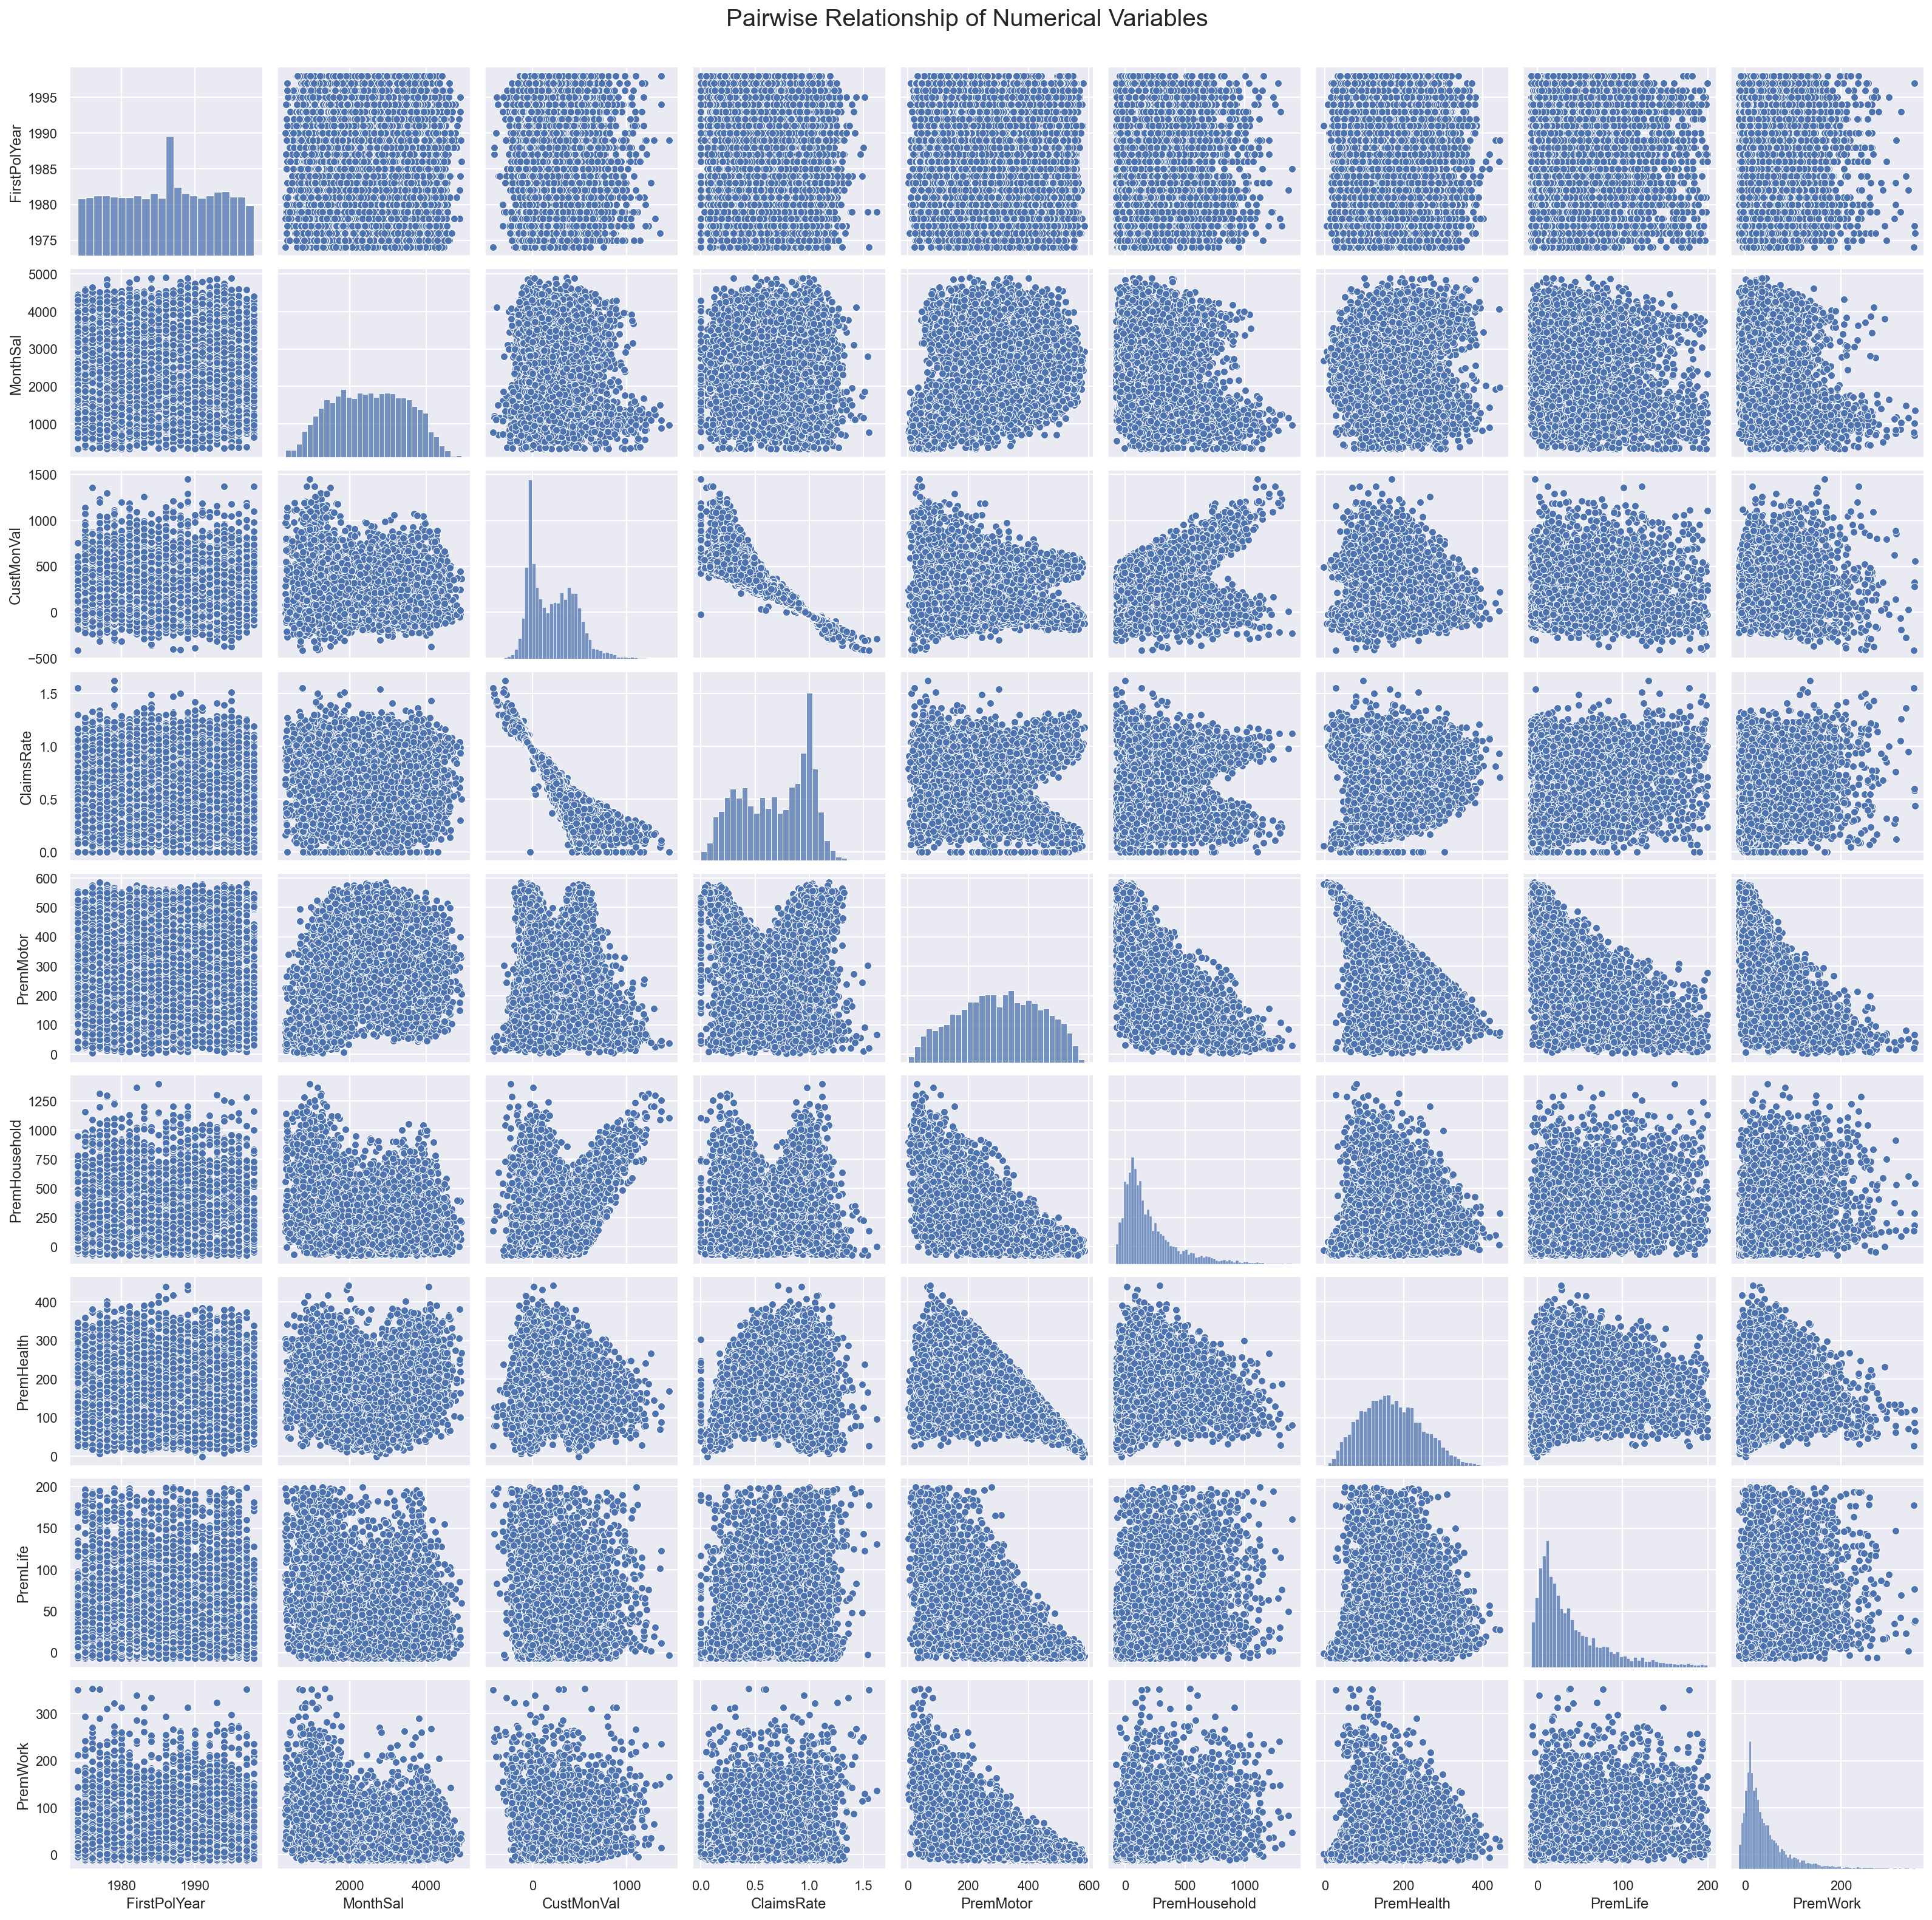

In [214]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data_consist[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [62]:
data_out_rmv=data_consist.copy()


<a class="anchor" id="scale1">

## Scale the data
    
</a>

In [63]:
# scale the data before the missing values imputation due to KNN

from sklearn.preprocessing import RobustScaler
# Use MinMaxScaler to scale the data
#scaler = RobustScaler()
scaler=MinMaxScaler()
scaled_feat = scaler.fit_transform(data_out_rmv[metric_features])
scaled_feat

array([[0.125     ,        nan, 0.28316202, ..., 0.2297683 , 0.15346223,
        0.11594283],
       [0.375     , 0.23320936, 0.47902155, ..., 0.47926827,        nan,
        0.07607207],
       [0.20833333, 0.48238897, 0.30365521, ...,        nan, 0.21485682,
        0.08124761],
       ...,
       [0.83333333, 0.56552177, 0.50446376, ..., 0.32442638, 0.09531424,
        0.04625116],
       [0.29166667, 0.35834609, 0.35752087, ..., 0.45054723, 0.3435577 ,
        0.34205051],
       [0.66666667, 0.54298841, 0.4721047 , ..., 0.32217903, 0.0673063 ,
        0.06815817]])

In [64]:
# # See what the fit method is doing (notice the trailing underscore):
# print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

In [65]:
data_out_rmv[metric_features] = scaled_feat
data_out_rmv.head()

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  CustMonVal  \
CustID                                                                          
22.0        0.125000       NaN            2           3         1    0.283162   
69.0        0.375000  0.233209            2           4         1    0.479022   
139.0       0.208333  0.482389            2           2         1    0.303655   
144.0       0.916667       NaN            3           4         1    0.200685   
185.0       0.791667  0.456355            2           4         1    0.190079   

        ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  
CustID                                                                        
22.0      0.493827   0.695427       0.127033    0.229768  0.153462  0.115943  
69.0      0.203704   0.563811       0.178064    0.479268       NaN  0.076072  
139.0     0.425926   0.329905       0.258964         NaN  0.214857  0.081248  
144.0     0.629630   0.247806       0.291862    0.499247  0.624122  0.147900  
185.0     0.660494        NaN       0.223821    0.522979  0.062461  0.150939

In [66]:
# Checking max and min of minmaxed variables
data_out_rmv[metric_features].describe().round(2).T

count  mean   std  min   25%   50%   75%  max
FirstPolYear   10021.0  0.50  0.28  0.0  0.25  0.50  0.75  1.0
MonthSal       10015.0  0.48  0.21  0.0  0.31  0.48  0.65  1.0
CustMonVal     10051.0  0.34  0.13  0.0  0.22  0.32  0.44  1.0
ClaimsRate     10051.0  0.42  0.20  0.0  0.24  0.44  0.60  1.0
PremMotor      10018.0  0.51  0.23  0.0  0.34  0.52  0.70  1.0
PremHousehold  10051.0  0.19  0.15  0.0  0.08  0.14  0.24  1.0
PremHealth     10009.0  0.38  0.17  0.0  0.26  0.37  0.50  1.0
PremLife        9947.0  0.22  0.20  0.0  0.08  0.15  0.30  1.0
PremWork        9965.0  0.14  0.13  0.0  0.06  0.10  0.18  1.0

<a class="anchor" id="missings">

## Missing Values
    
</a>

In [209]:
# Checking maximum number of nan in a record
maxi=0
ind_max=[]

for i, v in enumerate(data_out_rmv):

    if data_out_rmv.iloc[i,:].isna().sum()>maxi:
        maxi=data_out_rmv.iloc[i,:].isna().sum()

for i, v in enumerate(data_out_rmv):
    if data_out_rmv.iloc[i,:].isna().sum()==maxi:
        ind_max.append(i)
        
print(maxi,ind_max)

#decided not to drop the records since there are many more features.

3 [6, 11]


In [67]:
data_out_rmv.iloc[11]

FirstPolYear        0.125
MonthSal             <NA>
EducDeg_ord           3.0
GeoLivArea            3.0
Children              0.0
CustMonVal       0.195264
ClaimsRate        0.67284
PremMotor            <NA>
PremHousehold    0.051031
PremHealth       0.631368
PremLife             <NA>
PremWork          0.10833
Name: 489.0, dtype: Float64

In [68]:
check_nan_feature=pd.DataFrame(data_out_rmv.isna().sum()).rename(columns={0:'Nr_missings'})
#check_nan_feature.columns.values[0]="Nr_missings"
print(check_nan_feature)
check_nan_feature['perc']=check_nan_feature['Nr_missings']/len(data_out_rmv) *100

               Nr_missings
FirstPolYear            30
MonthSal                36
EducDeg_ord             17
GeoLivArea               1
Children                21
CustMonVal               0
ClaimsRate               0
PremMotor               33
PremHousehold            0
PremHealth              42
PremLife               104
PremWork                86


In [69]:
check_nan_feature
# there is no feature with more than 20% of nan values-- no feature will be removed

Nr_missings      perc
FirstPolYear            30  0.298478
MonthSal                36  0.358173
EducDeg_ord             17  0.169137
GeoLivArea               1  0.009949
Children                21  0.208934
CustMonVal               0  0.000000
ClaimsRate               0  0.000000
PremMotor               33  0.328326
PremHousehold            0  0.000000
PremHealth              42  0.417869
PremLife               104  1.034723
PremWork                86  0.855636

### Premiums missings treatment

In [70]:
# Filled nan values in insurance expenses with 0
data_out_rmv['PremMotor'].fillna(0, inplace = True)
data_out_rmv['PremHealth'].fillna(0, inplace = True)
data_out_rmv['PremLife'].fillna(0, inplace = True)
data_out_rmv['PremWork'].fillna(0, inplace = True)

<a class="anchor" id="mode_missing">

## Mode
    
</a>

### GeoLivArea missings treatment

In [71]:
data_out_rmv['GeoLivArea'].value_counts()

4    4041
1    2983
3    2015
2    1011
Name: GeoLivArea, dtype: Int64

In [72]:
mode_geo = data['GeoLivArea'].mode().loc[0]
data_out_rmv['GeoLivArea'].fillna(mode_geo, inplace=True)

In [73]:
data_out_rmv.isna().sum()

FirstPolYear     30
MonthSal         36
EducDeg_ord      17
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [74]:
#data_out_rmv=data_out_rmv[~((data_out_rmv['FirstPolYear'].isna()) & (data_out_rmv['BirthYear'].isna()))]

<a class="anchor" id="KNN_missing">

## KNN
    
</a>

### MonthSal and FirstPolYear missings treatment - KNNImputer

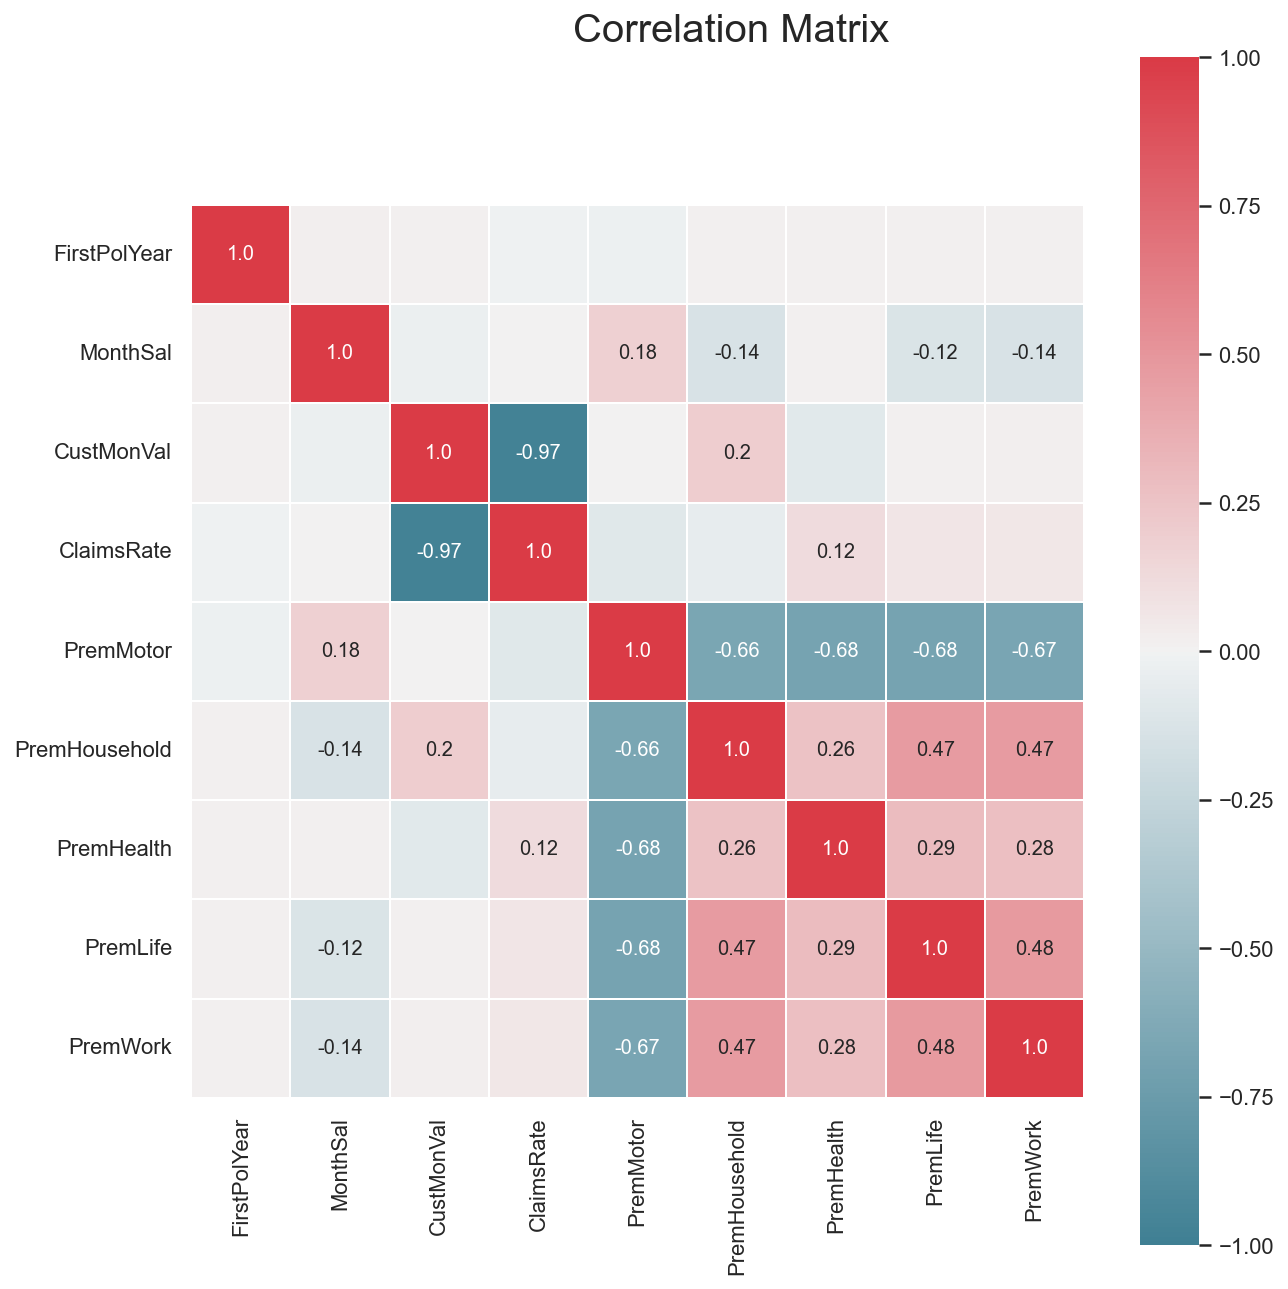

In [75]:
# Prepare figure
fig = plt.figure(figsize=(10, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases.
corr = np.round(data_out_rmv[metric_features].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.1
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

In [76]:
# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=5, weights="distance")
prem_list=['PremMotor','PremHousehold','PremLife','PremWork','MonthSal','FirstPolYear']
data_out_rmv[prem_list]=imputer.fit_transform(data_out_rmv[prem_list])

In [77]:
data_out_rmv.isna().sum()

FirstPolYear      0
MonthSal          0
EducDeg_ord      17
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

### EducDeg_ord missings treatment - KNNClassifier

In [78]:
data_out_rmv['EducDeg_ord'].value_counts()

3    4771
2    3429
1    1138
4     696
Name: EducDeg_ord, dtype: Int64

In [79]:
# # Pairwise Relationship of Numerical Variables
# sns.set()
# educ_vals = data_out_rmv.EducDeg_ord.dropna()
# # Setting pairplot
# sns.pairplot(data_out_rmv[metric_features + ['EducDeg_ord']], diag_kind="hist", hue='EducDeg_ord')
# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
# plt.show()

In [80]:
def metrics_def(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [81]:
missings_educ = data_out_rmv[data_out_rmv['EducDeg_ord'].isna()].drop(['EducDeg_ord','Children'], axis=1)
input_data_educ = data_out_rmv[~data_out_rmv['EducDeg_ord'].isna()]

X_knn_educ = input_data_educ.drop(['EducDeg_ord','Children'], axis=1)[['MonthSal','PremHousehold','PremMotor','CustMonVal']]
y_knn_educ = input_data_educ['EducDeg_ord']
y_knn_educ = y_knn_educ.astype('int')

In [82]:
X_train_knn_educ, X_val_knn_educ, y_train_knn_educ, y_val_knn_educ = train_test_split(X_knn_educ, y_knn_educ, train_size=0.7, stratify = y_knn_educ, random_state=5,shuffle=True)

# oversample = SMOTE()
# X_over_educ, y_over_educ = oversample.fit_resample(X_train_knn_educ, y_train_knn_educ)

In [83]:
# from collections import Counter
# print('Resampled dataset shape %s' % Counter(y_over_educ))

In [84]:
modelKNN = KNeighborsClassifier(n_neighbors=7)
#modelKNN.fit(X = X_over_educ, y = y_over_educ)
modelKNN.fit(X = X_train_knn_educ, y = y_train_knn_educ)

KNeighborsClassifier(n_neighbors=7)

In [85]:
labels_train = modelKNN.predict(X_train_knn_educ)
labels_val = modelKNN.predict(X_val_knn_educ)
labels_val

array([3, 2, 3, ..., 3, 3, 3])

In [86]:
target_names = ['class 1', 'class 2', 'class 3','class 4']
metrics_def(y_train_knn_educ, labels_train , y_val_knn_educ, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.60      0.40      0.48       797
           2       0.57      0.61      0.59      2400
           3       0.66      0.76      0.70      3339
           4       0.64      0.09      0.16       487

    accuracy                           0.62      7023
   macro avg       0.62      0.46      0.48      7023
weighted avg       0.62      0.62      0.60      7023

[[ 319  278  197    3]
 [ 146 1461  784    9]
 [  63  737 2527   12]
 [   8   98  338   43]]
___________________________________________________________________________________________________________
                                        

In [87]:
#modelKNN.kneighbors(X = X_val_knn_educ)

In [88]:
imputed_educ= modelKNN.predict(missings_educ[['MonthSal','PremHousehold','PremMotor','CustMonVal']])
imputed_educ

array([3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2])

In [89]:
teste=data_out_rmv[data_out_rmv['EducDeg_ord'].isna()]

In [90]:
teste['EducDeg_ord']=imputed_educ

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_4448/4193100922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['EducDeg_ord']=imputed_educ


In [91]:
data_out_rmv=pd.concat([input_data_educ,teste])

In [92]:
data_out_rmv.isna().sum()

FirstPolYear      0
MonthSal          0
EducDeg_ord       0
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

<a class="anchor" id="logistic_missing">

## Logistic Regression
    
</a>

### Children missings treatment

In [93]:
input_data=data_out_rmv.copy()

In [94]:
input_data.isna().sum()

FirstPolYear      0
MonthSal          0
EducDeg_ord       0
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [95]:
missings_children= input_data[input_data['Children'].isna()].drop('Children', axis=1)
input_data_log=input_data[~input_data['Children'].isna()]
X_input_data_log=input_data_log.drop('Children', axis=1)[['PremLife','PremWork','MonthSal']]
y_log=pd.DataFrame(input_data_log['Children'])
y_log=y_log.astype('int')

X_train_log, X_val_log,y_train_log,y_val_log = train_test_split(X_input_data_log,y_log,test_size=0.2,random_state=5, stratify=y_log)

lr = LogisticRegression(random_state=42)
lr.fit(X_train_log,y_train_log)

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=42)

In [96]:
input_data_log=input_data[~input_data['Children'].isna()]
X_input_data_log=input_data_log.drop('Children', axis=1)
X_input_data_log[['PremLife','PremWork','MonthSal']]

PremLife  PremWork  MonthSal
CustID                              
22.0    0.153462  0.115943  0.591337
69.0    0.000000  0.076072  0.233209
139.0   0.214857  0.081248  0.482389
144.0   0.624122  0.147900  0.141107
185.0   0.062461  0.150939  0.456355
...          ...       ...       ...
8174.0  0.276784  0.223369  0.842266
8304.0  0.090469  0.091599  0.742945
9137.0  0.828221  0.471083  0.310654
9313.0  0.066773  0.073635  0.485452
9611.0  0.081843  0.157018  0.562678

[10030 rows x 3 columns]

In [97]:
y_pred_val_log = lr.predict(X_val_log)


In [98]:
y_pred_train_log = lr.predict(X_train_log)

# no overfitting -- f1 score from validation is similar with f1 score for train

In [99]:
metrics_def(y_train_log,y_pred_train_log,y_val_log,y_pred_val_log)
# no overfitting

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      2334
           1       0.84      0.91      0.87      5690

    accuracy                           0.81      8024
   macro avg       0.78      0.74      0.76      8024
weighted avg       0.81      0.81      0.81      8024

[[1331 1003]
 [ 492 5198]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [100]:
imputed_children= lr.predict(missings_children[['PremLife','PremWork','MonthSal']])
imputed_children

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [101]:
missings_children['Children']=imputed_children

In [102]:
data_out_rmv=pd.concat([input_data_log,missings_children])

In [103]:
data_out_miss=data_out_rmv.copy()

In [104]:
data_out_miss.isna().sum()

FirstPolYear     0
MonthSal         0
EducDeg_ord      0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64


<a class="anchor" id="eng">

### 2.4. Feature Engineering
    
</a>


In [106]:
max_polyear=np.max(data_consist['FirstPolYear'])
min_polyear=np.min(data_consist['FirstPolYear'])

new_year=(2016-min_polyear)/(max_polyear-min_polyear)

# med_polyear=np.median(data_consist[~data_consist.isna().any(axis=1)]['FirstPolYear'])
# q75=np.quantile(data_consist[~data_consist.isna().any(axis=1)]['FirstPolYear'],0.75)
# q25=np.quantile(data_consist[~data_consist.isna().any(axis=1)]['FirstPolYear'],0.25)

# new_year= (2016 - med_polyear) / (q75 - q25)

In [107]:
data_out_miss['year_cust']=new_year-data_out_rmv['FirstPolYear']

In [108]:
data_out_miss['Total_Premiums']=data_out_miss.loc[:,['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']][data_out_miss>0].sum(1)
#remove Total_Premiums==0

In [109]:
data_out_miss['annual_profit']=data_out_miss['CustMonVal']/data_out_miss['year_cust']

In [110]:
# data_out_miss['log_monthSal']=np.log10(data_out_miss['MonthSal'])

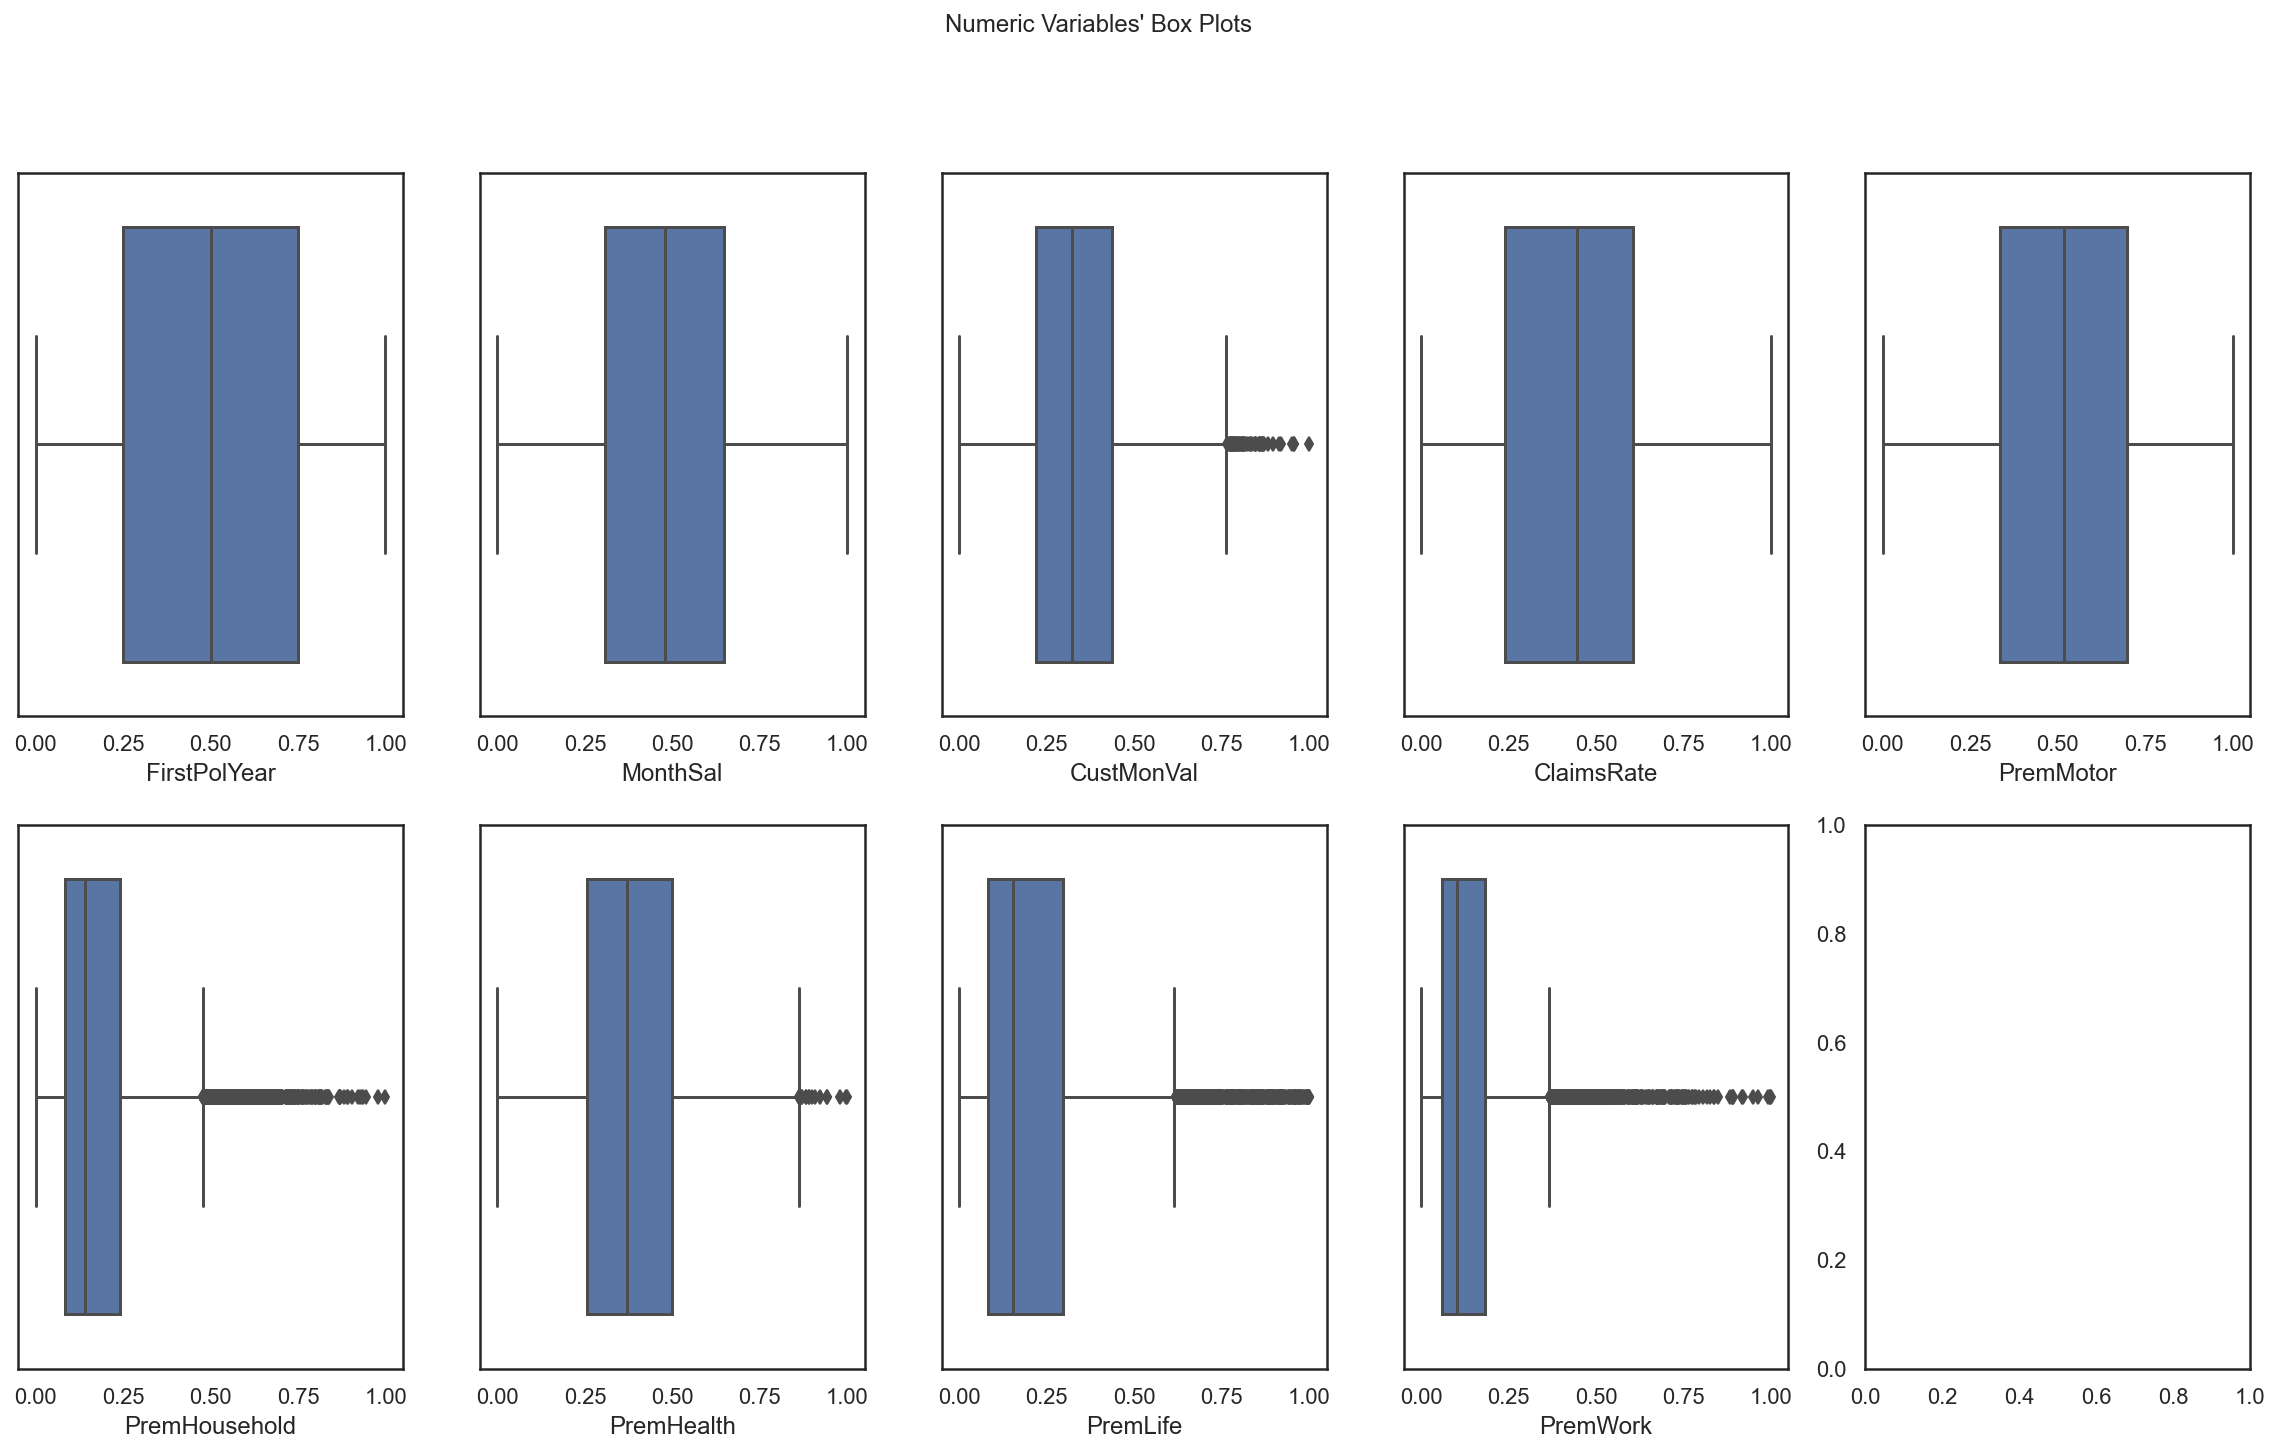

In [111]:
# All Numeric Variables' Box Plots in one figure
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_out_miss[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)


plt.show()

In [112]:
# ver numeros negativos em PREM

data_out_miss['log_custMon']=np.log10(data_out_miss['CustMonVal']+1)
#data_out_miss['log_claims']=np.log10(data_out_miss['ClaimsRate'])
#data_out_miss['log_health']=np.log10(data_out_miss['PremHealth']+1)
data_out_miss['log_household']=np.log10(data_out_miss['PremHousehold']+1)
data_out_miss['log_life']=np.log10(data_out_miss['PremLife']+1)
#data_out_miss['log_motor']=np.log10(data_out_miss['PremMotor'])
data_out_miss['log_work']=np.log10(data_out_miss['PremWork']+1)

data_out_miss['AnnualSal']=data_out_miss['MonthSal']*12

data_out_miss['perc_inc_health']=np.where(
        data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremHealth'],data_out_miss['AnnualSal']) )
    
data_out_miss['perc_inc_household']=np.where(
        data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremHousehold'],data_out_miss['AnnualSal']) )

data_out_miss['perc_inc_life']=np.where(
        data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremLife'],data_out_miss['AnnualSal']) )

data_out_miss['perc_inc_motor']=np.where(
        data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremMotor'],data_out_miss['AnnualSal']) )
data_out_miss['perc_inc_work']=np.where(
        data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremWork'],data_out_miss['AnnualSal']) )


In [ ]:
# # ver numeros negativos em PREM

# #data_out_miss['log_custMon']=np.log10(data_out_miss['CustMonVal']+1)
# #data_out_miss['log_claims']=np.log10(data_out_miss['ClaimsRate'])
# #data_out_miss['log_health']=np.log10(data_out_miss['PremHealth']+1)
# data_out_miss['log_household']=np.log10(data_out_miss['PremHousehold']-min(data_out_miss['PremHousehold'])+1)
# data_out_miss['log_life']=np.log10(data_out_miss['PremLife']-min(data_out_miss['PremLife'])+1)
# #data_out_miss['log_motor']=np.log10(data_out_miss['PremMotor'])
# data_out_miss['log_work']=np.log10(data_out_miss['PremWork']-min(data_out_miss['PremWork'])+1)

# data_out_miss['AnnualSal']=data_out_miss['MonthSal']*12

# data_out_miss['perc_inc_health']=np.where(
#         data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremHealth'],data_out_miss['AnnualSal']) )
    
# data_out_miss['perc_inc_household']=np.where(
#         data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremHousehold'],data_out_miss['AnnualSal']) )

# data_out_miss['perc_inc_life']=np.where(
#         data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremLife'],data_out_miss['AnnualSal']) )

# data_out_miss['perc_inc_motor']=np.where(
#         data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremMotor'],data_out_miss['AnnualSal']) )
        
# data_out_miss['perc_inc_work']=np.where(
#         data_out_miss['AnnualSal']==0, 0,np.divide(data_out_miss['PremWork'],data_out_miss['AnnualSal']) )


In [113]:
data_out_miss.describe().T

count      mean       std       min       25%       50%  \
FirstPolYear        10051.0  0.500958  0.275273  0.000000  0.250000  0.500000   
MonthSal            10051.0  0.478105  0.212592  0.000000  0.308466  0.479326   
EducDeg_ord         10051.0  2.501144  0.784219  1.000000  2.000000  3.000000   
GeoLivArea          10051.0  2.707989  1.266796  1.000000  1.000000  3.000000   
Children            10051.0  0.709382  0.454070  0.000000  0.000000  1.000000   
CustMonVal          10051.0  0.338760  0.133557  0.000000  0.218503  0.323435   
ClaimsRate          10051.0  0.419766  0.196107  0.000000  0.240741  0.444444   
PremMotor           10051.0  0.512511  0.233385  0.000000  0.335424  0.516574   
PremHousehold       10051.0  0.185536  0.148731  0.000000  0.084303  0.140267   
PremHealth          10051.0  0.382565  0.168422  0.000000  0.256242  0.371126   
PremLife            10051.0  0.218863  0.195535  0.000000  0.081310  0.152929   
PremWork            10051.0  0.141688  0.125701  0.000000  0.059943  0.102251   
year_cust           10051.0  1.249042  0.275273  0.750000  1.000000  1.250000   
Total_Premiums      10051.0  1.441163  0.223282  0.051031  1.278874  1.407449   
annual_profit       10051.0  0.285971  0.134794  0.000000  0.181688  0.260872   
log_custMon         10051.0  0.124609  0.042342  0.000000  0.085827  0.121703   
log_household       10051.0  0.070844  0.050360  0.000000  0.035151  0.057006   
log_life            10051.0  0.081006  0.063717  0.000000  0.033950  0.061803   
log_work            10051.0  0.055216  0.043747  0.000000  0.025283  0.042280   
AnnualSal           10051.0  5.737264  2.551105  0.000000  3.701597  5.751914   
perc_inc_health     10051.0  0.146117  1.961353  0.000000  0.040612  0.062454   
perc_inc_household  10051.0  0.108918  2.257730  0.000000  0.013674  0.024072   
perc_inc_life       10051.0  0.147440  3.525678  0.000000  0.013092  0.026817   
perc_inc_motor      10051.0  0.125376  0.819020  0.000000  0.057293  0.094030   
perc_inc_work       10051.0  0.079331  1.313697  0.000000  0.009699  0.017701   

                         75%         max  
FirstPolYear        0.750000    1.000000  
MonthSal            0.648108    1.000000  
EducDeg_ord         3.000000    4.000000  
GeoLivArea          4.000000    4.000000  
Children            1.000000    1.000000  
CustMonVal          0.436716    1.000000  
ClaimsRate          0.604938    1.000000  
PremMotor           0.698667    1.000000  
PremHousehold       0.241954    1.000000  
PremHealth          0.499000    1.000000  
PremLife            0.296167    1.000000  
PremWork            0.182896    1.000000  
year_cust           1.500000    1.750000  
Total_Premiums      1.567874    2.232828  
annual_profit       0.360677    1.277155  
log_custMon         0.157371    0.301030  
log_household       0.094106    0.301030  
log_life            0.112661    0.301030  
log_work            0.072947    0.301030  
AnnualSal           7.777292   12.000000  
perc_inc_health     0.110362  159.824578  
perc_inc_household  0.049425  209.248875  
perc_inc_life       0.058745  282.868055  
perc_inc_motor      0.140417   73.171596  
perc_inc_work       0.036741  101.430354

In [268]:
data_out_miss.isna().sum()

FirstPolYear          0
MonthSal              0
EducDeg_ord           0
GeoLivArea            0
Children              0
CustMonVal            0
ClaimsRate            0
PremMotor             0
PremHousehold         0
PremHealth            0
PremLife              0
PremWork              0
year_cust             0
Total_Premiums        0
annual_profit         0
log_household         0
log_life              0
log_work              0
AnnualSal             0
perc_inc_health       0
perc_inc_household    0
perc_inc_life         0
perc_inc_motor        0
perc_inc_work         0
dtype: int64

In [114]:
# Use MinMaxScaler to scale the data
#scaler = RobustScaler()
scaler=MinMaxScaler()
scaled_feat1 = scaler.fit_transform(data_out_miss.drop(non_metric_features,axis=1))

In [115]:
data_out_rmv[data_out_miss.drop(non_metric_features,axis=1).columns.to_list()] = scaled_feat1
data_out_rmv.describe().T

count      mean       std  min       25%       50%  \
FirstPolYear        10051.0  0.500958  0.275273  0.0  0.250000  0.500000   
MonthSal            10051.0  0.478105  0.212592  0.0  0.308466  0.479326   
EducDeg_ord         10051.0  2.501144  0.784219  1.0  2.000000  3.000000   
GeoLivArea          10051.0  2.707989  1.266796  1.0  1.000000  3.000000   
Children            10051.0  0.709382  0.454070  0.0  0.000000  1.000000   
CustMonVal          10051.0  0.338760  0.133557  0.0  0.218503  0.323435   
ClaimsRate          10051.0  0.419766  0.196107  0.0  0.240741  0.444444   
PremMotor           10051.0  0.512511  0.233385  0.0  0.335424  0.516574   
PremHousehold       10051.0  0.185536  0.148731  0.0  0.084303  0.140267   
PremHealth          10051.0  0.382565  0.168422  0.0  0.256242  0.371126   
PremLife            10051.0  0.218863  0.195535  0.0  0.081310  0.152929   
PremWork            10051.0  0.141688  0.125701  0.0  0.059943  0.102251   
year_cust           10051.0  0.499042  0.275273  0.0  0.250000  0.500000   
Total_Premiums      10051.0  0.637150  0.102339  0.0  0.562767  0.621697   
annual_profit       10051.0  0.223912  0.105542  0.0  0.142260  0.204261   
log_custMon         10051.0  0.413943  0.140657  0.0  0.285110  0.404288   
log_household       10051.0  0.235340  0.167292  0.0  0.116768  0.189371   
log_life            10051.0  0.269097  0.211662  0.0  0.112781  0.205304   
log_work            10051.0  0.183423  0.145324  0.0  0.083987  0.140453   
AnnualSal           10051.0  0.478105  0.212592  0.0  0.308466  0.479326   
perc_inc_health     10051.0  0.000914  0.012272  0.0  0.000254  0.000391   
perc_inc_household  10051.0  0.000521  0.010790  0.0  0.000065  0.000115   
perc_inc_life       10051.0  0.000521  0.012464  0.0  0.000046  0.000095   
perc_inc_motor      10051.0  0.001713  0.011193  0.0  0.000783  0.001285   
perc_inc_work       10051.0  0.000782  0.012952  0.0  0.000096  0.000175   

                         75%  max  
FirstPolYear        0.750000  1.0  
MonthSal            0.648108  1.0  
EducDeg_ord         3.000000  4.0  
GeoLivArea          4.000000  4.0  
Children            1.000000  1.0  
CustMonVal          0.436716  1.0  
ClaimsRate          0.604938  1.0  
PremMotor           0.698667  1.0  
PremHousehold       0.241954  1.0  
PremHealth          0.499000  1.0  
PremLife            0.296167  1.0  
PremWork            0.182896  1.0  
year_cust           0.750000  1.0  
Total_Premiums      0.695226  1.0  
annual_profit       0.282407  1.0  
log_custMon         0.522775  1.0  
log_household       0.312612  1.0  
log_life            0.374252  1.0  
log_work            0.242323  1.0  
AnnualSal           0.648108  1.0  
perc_inc_health     0.000691  1.0  
perc_inc_household  0.000236  1.0  
perc_inc_life       0.000208  1.0  
perc_inc_motor      0.001919  1.0  
perc_inc_work       0.000362  1.0

### One-hot Encoding

In [116]:
ohc_feat_list = ['EducDeg_ord', 'GeoLivArea']

In [117]:
data_ohc = data_out_rmv.copy()

In [118]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse = False, drop = "first")
ohc_feat = ohc.fit_transform(data_ohc[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index = data_ohc.index, columns = ohc_feat_names) 
ohc_df

x0_2  x0_3  x0_4  x1_2  x1_3  x1_4
CustID                                     
22.0      1.0   0.0   0.0   0.0   1.0   0.0
69.0      1.0   0.0   0.0   0.0   0.0   1.0
139.0     1.0   0.0   0.0   1.0   0.0   0.0
144.0     0.0   1.0   0.0   0.0   0.0   1.0
185.0     1.0   0.0   0.0   0.0   0.0   1.0
...       ...   ...   ...   ...   ...   ...
8019.0    0.0   1.0   0.0   1.0   0.0   0.0
8375.0    0.0   0.0   0.0   1.0   0.0   0.0
8420.0    0.0   1.0   0.0   1.0   0.0   0.0
9325.0    1.0   0.0   0.0   1.0   0.0   0.0
10011.0   1.0   0.0   0.0   1.0   0.0   0.0

[10051 rows x 6 columns]

In [119]:
ohc_df.rename(columns={'x0_1':'EducDeg_ord1','x0_2':'EducDeg_ord2','x0_3':'EducDeg_ord3','x0_4':'EducDeg_ord4', 'x1_2':'GeoLivArea_2', 'x1_3':'GeoLivArea_3', 'x1_4':'GeoLivArea_4'},inplace=True)

In [120]:
data_ohc = pd.concat([data_ohc.drop(columns = ohc_feat_list), ohc_df], axis=1)
data_ohc

FirstPolYear  MonthSal  Children  CustMonVal  ClaimsRate  PremMotor  \
CustID                                                                         
22.0         0.125000  0.591337         1    0.283162    0.493827   0.695427   
69.0         0.375000  0.233209         1    0.479022    0.203704   0.563811   
139.0        0.208333  0.482389         1    0.303655    0.425926   0.329905   
144.0        0.916667  0.141107         1    0.200685    0.629630   0.247806   
185.0        0.791667  0.456355         1    0.190079    0.660494   0.000000   
...               ...       ...       ...         ...         ...        ...   
8019.0       0.333333  0.517611         1    0.456507    0.098765   0.870287   
8375.0       0.791667  0.129293         1    0.091581    0.740741   0.096377   
8420.0       0.083333  0.558084         1    0.509289    0.049383   0.903812   
9325.0       0.833333  0.352002         1    0.419794    0.234568   0.521905   
10011.0      0.750000  0.793262         0    0.154685    0.703704   0.301711   

         PremHousehold  PremHealth  PremLife  PremWork  ...  \
CustID                                                  ...   
22.0          0.127033    0.229768  0.153462  0.115943  ...   
69.0          0.178064    0.479268  0.000000  0.076072  ...   
139.0         0.258964    0.000000  0.214857  0.081248  ...   
144.0         0.291862    0.499247  0.624122  0.147900  ...   
185.0         0.223821    0.522979  0.062461  0.150939  ...   
...                ...         ...       ...       ...  ...   
8019.0        0.033646    0.168079  0.028541  0.013692  ...   
8375.0        0.468055    0.432816  0.253089  0.513993  ...   
8420.0        0.068041    0.117131  0.029074  0.046552  ...   
9325.0        0.100939    0.505495  0.109851  0.064516  ...   
10011.0       0.155372    0.704295  0.362407  0.129936  ...   

         perc_inc_household  perc_inc_life  perc_inc_motor  perc_inc_work  \
CustID                                                                      
22.0               0.000086       0.000076        0.001339       0.000161   
69.0               0.000304       0.000000        0.002753       0.000268   
139.0              0.000214       0.000131        0.000779       0.000138   
144.0              0.000824       0.001303        0.002000       0.000861   
185.0              0.000195       0.000040        0.000000       0.000272   
...                     ...            ...             ...            ...   
8019.0             0.000026       0.000016        0.001915       0.000022   
8375.0             0.001442       0.000577        0.000849       0.003266   
8420.0             0.000049       0.000015        0.001844       0.000069   
9325.0             0.000114       0.000092        0.001689       0.000151   
10011.0            0.000078       0.000135        0.000433       0.000135   

         EducDeg_ord2  EducDeg_ord3  EducDeg_ord4  GeoLivArea_2  GeoLivArea_3  \
CustID                                                                          
22.0              1.0           0.0           0.0           0.0           1.0   
69.0              1.0           0.0           0.0           0.0           0.0   
139.0             1.0           0.0           0.0           1.0           0.0   
144.0             0.0           1.0           0.0           0.0           0.0   
185.0             1.0           0.0           0.0           0.0           0.0   
...               ...           ...           ...           ...           ...   
8019.0            0.0           1.0           0.0           1.0           0.0   
8375.0            0.0           0.0           0.0           1.0           0.0   
8420.0            0.0           1.0           0.0           1.0           0.0   
9325.0            1.0           0.0           0.0           1.0           0.0   
10011.0           1.0           0.0           0.0           1.0           0.0   

         GeoLivArea_4  
CustID                 
22.0              0.0  
69.0              1.

In [121]:
data_out_rmv.columns

Index(['FirstPolYear', 'MonthSal', 'EducDeg_ord', 'GeoLivArea', 'Children',
       'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth',
       'PremLife', 'PremWork', 'year_cust', 'Total_Premiums', 'annual_profit',
       'log_custMon', 'log_household', 'log_life', 'log_work', 'AnnualSal',
       'perc_inc_health', 'perc_inc_household', 'perc_inc_life',
       'perc_inc_motor', 'perc_inc_work'],
      dtype='object')


<a class="anchor" id="redo-out">

## 2.7 Redo outliers check
    
</a>

In [122]:
new_metric_feat=data_out_rmv.drop(non_metric_features,axis=1).columns.to_list()

In [123]:
new_metric_feat

['FirstPolYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'year_cust',
 'Total_Premiums',
 'annual_profit',
 'log_custMon',
 'log_household',
 'log_life',
 'log_work',
 'AnnualSal',
 'perc_inc_health',
 'perc_inc_household',
 'perc_inc_life',
 'perc_inc_motor',
 'perc_inc_work']

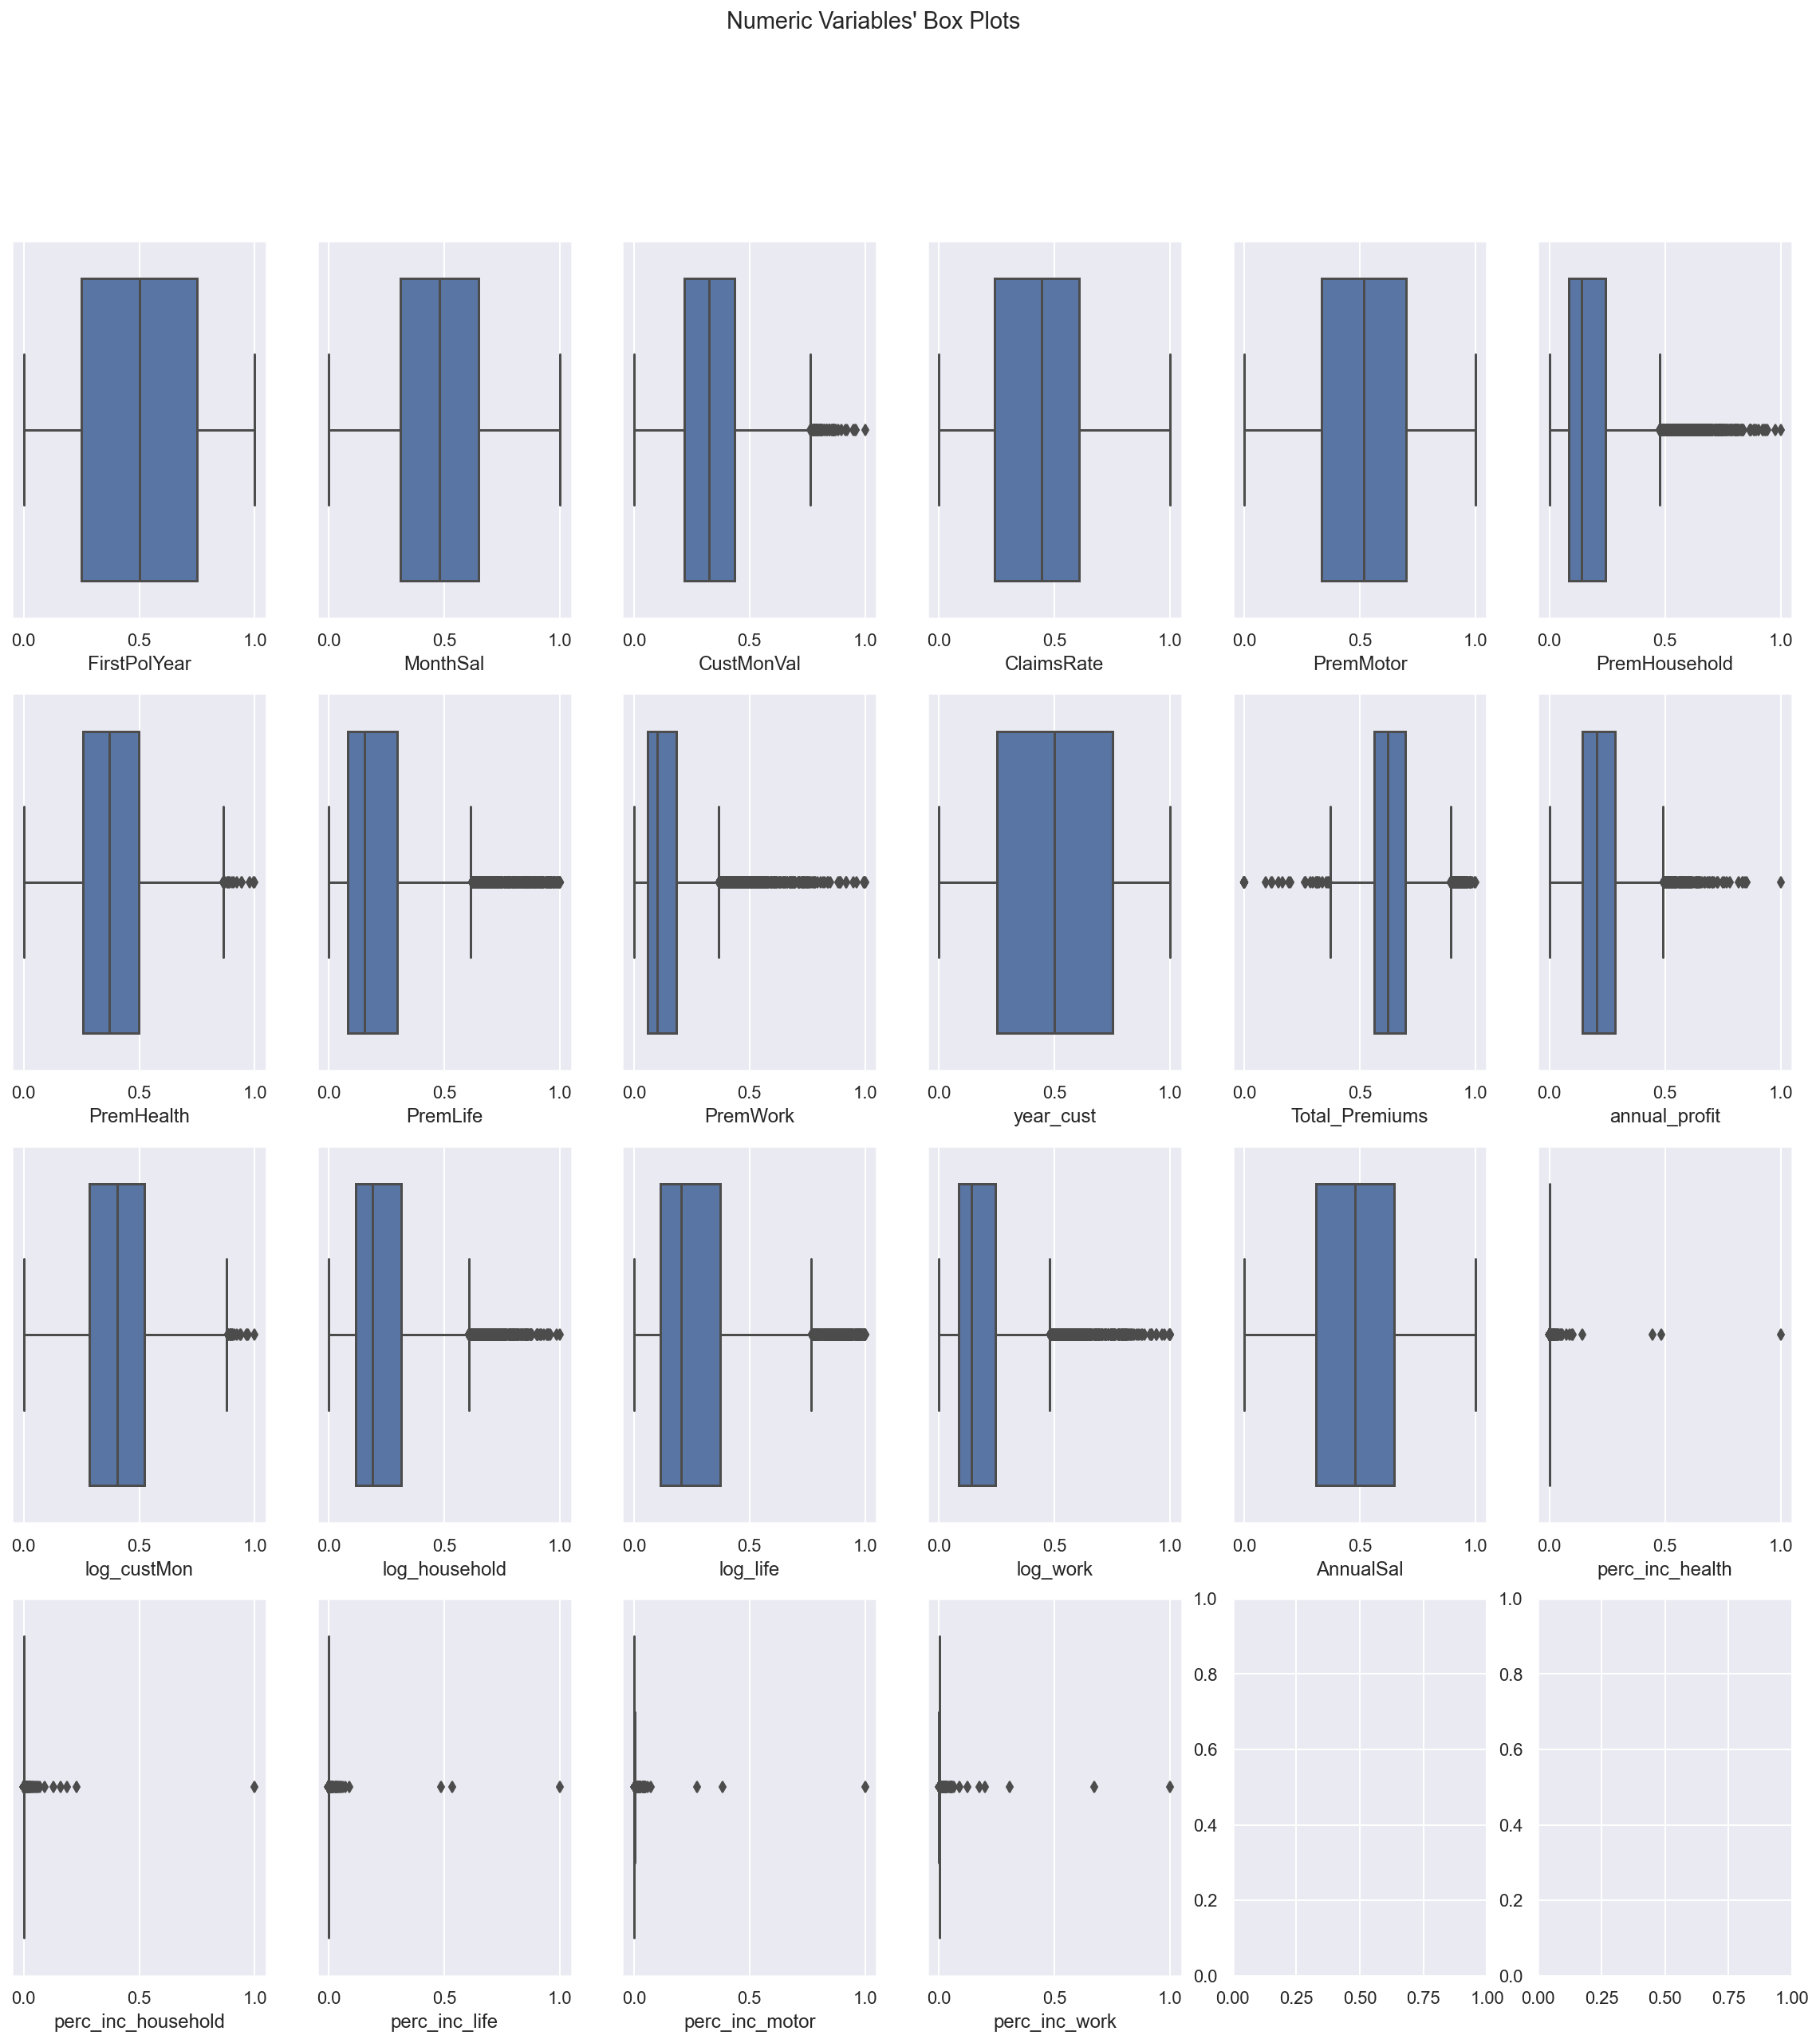

In [124]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(new_metric_feat) / 4), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), new_metric_feat): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_out_rmv[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [128]:

filters_perc = (
    
    (data_out_rmv['perc_inc_motor']>-2)
)
data_out_rmv=data_out_rmv[filters_perc]

In [129]:
len(data_out_rmv)
# print percentage of outliers

9329

In [125]:
data_selection=data_out_rmv.copy()
data_selection

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
22.0         0.125000  0.591337            2           3         1   
69.0         0.375000  0.233209            2           4         1   
139.0        0.208333  0.482389            2           2         1   
144.0        0.916667  0.141107            3           4         1   
185.0        0.791667  0.456355            2           4         1   
...               ...       ...          ...         ...       ...   
8019.0       0.333333  0.517611            3           2         1   
8375.0       0.791667  0.129293            1           2         1   
8420.0       0.083333  0.558084            3           2         1   
9325.0       0.833333  0.352002            2           2         1   
10011.0      0.750000  0.793262            2           2         0   

         CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  ...  \
CustID                                                                 ...   
22.0       0.283162    0.493827   0.695427       0.127033    0.229768  ...   
69.0       0.479022    0.203704   0.563811       0.178064    0.479268  ...   
139.0      0.303655    0.425926   0.329905       0.258964    0.000000  ...   
144.0      0.200685    0.629630   0.247806       0.291862    0.499247  ...   
185.0      0.190079    0.660494   0.000000       0.223821    0.522979  ...   
...             ...         ...        ...            ...         ...  ...   
8019.0     0.456507    0.098765   0.870287       0.033646    0.168079  ...   
8375.0     0.091581    0.740741   0.096377       0.468055    0.432816  ...   
8420.0     0.509289    0.049383   0.903812       0.068041    0.117131  ...   
9325.0     0.419794    0.234568   0.521905       0.100939    0.505495  ...   
10011.0    0.154685    0.703704   0.301711       0.155372    0.704295  ...   

         log_custMon  log_household  log_life  log_work  AnnualSal  \
CustID                                                               
22.0        0.359703       0.172529  0.205971  0.158263   0.591337   
69.0        0.564643       0.236417  0.000000  0.105775   0.233209   
139.0       0.382562       0.332238  0.280786  0.112697   0.482389   
144.0       0.263858       0.369452  0.699660  0.198997   0.141107   
185.0       0.251058       0.291393  0.087409  0.202812   0.456355   
...              ...            ...       ...       ...        ...   
8019.0      0.542513       0.047743  0.040599  0.019619   0.517611   
8375.0      0.126420       0.553906  0.325489  0.598359   0.129293   
8420.0      0.593870       0.094967  0.041347  0.065645   0.558084   
9325.0      0.505682       0.138734  0.150366  0.090198   0.352002   
10011.0     0.207500       0.208357  0.446158  0.176241   0.793262   

         perc_inc_health  perc_inc_household  perc_inc_life  perc_inc_motor  \
CustID                                                                        
22.0            0.000203            0.000086       0.000076        0.001339   
69.0            0.001072            0.000304       0.000000        0.002753   
139.0           0.000000            0.000214       0.000131        0.000779   
144.0           0.001845            0.000824       0.001303        0.002000   
185.0           0.000598            0.000195       0.000040        0.000000   
...                  ...                 ...            ...             ...   
8019.0          0.000169            0.000026       0.000016        0.001915   
8375.0          0.001745            0.001442       0.000577        0.000849   
8420.0          0.000109            0.000049       0.000015        0.001844   
9325.0          0.000749            0.000114       0.000092        0.001689   
10011.0         0.000463            0.000078       0.000135        0.000433   

         perc_inc_work  
CustID                  
22.0          0.000161  
69.0          0.000268  
139.0         0.000138  
144.0         0.000


<a class="anchor" id="feat-selection">

### 2.6 Feature Selection
    
</a>


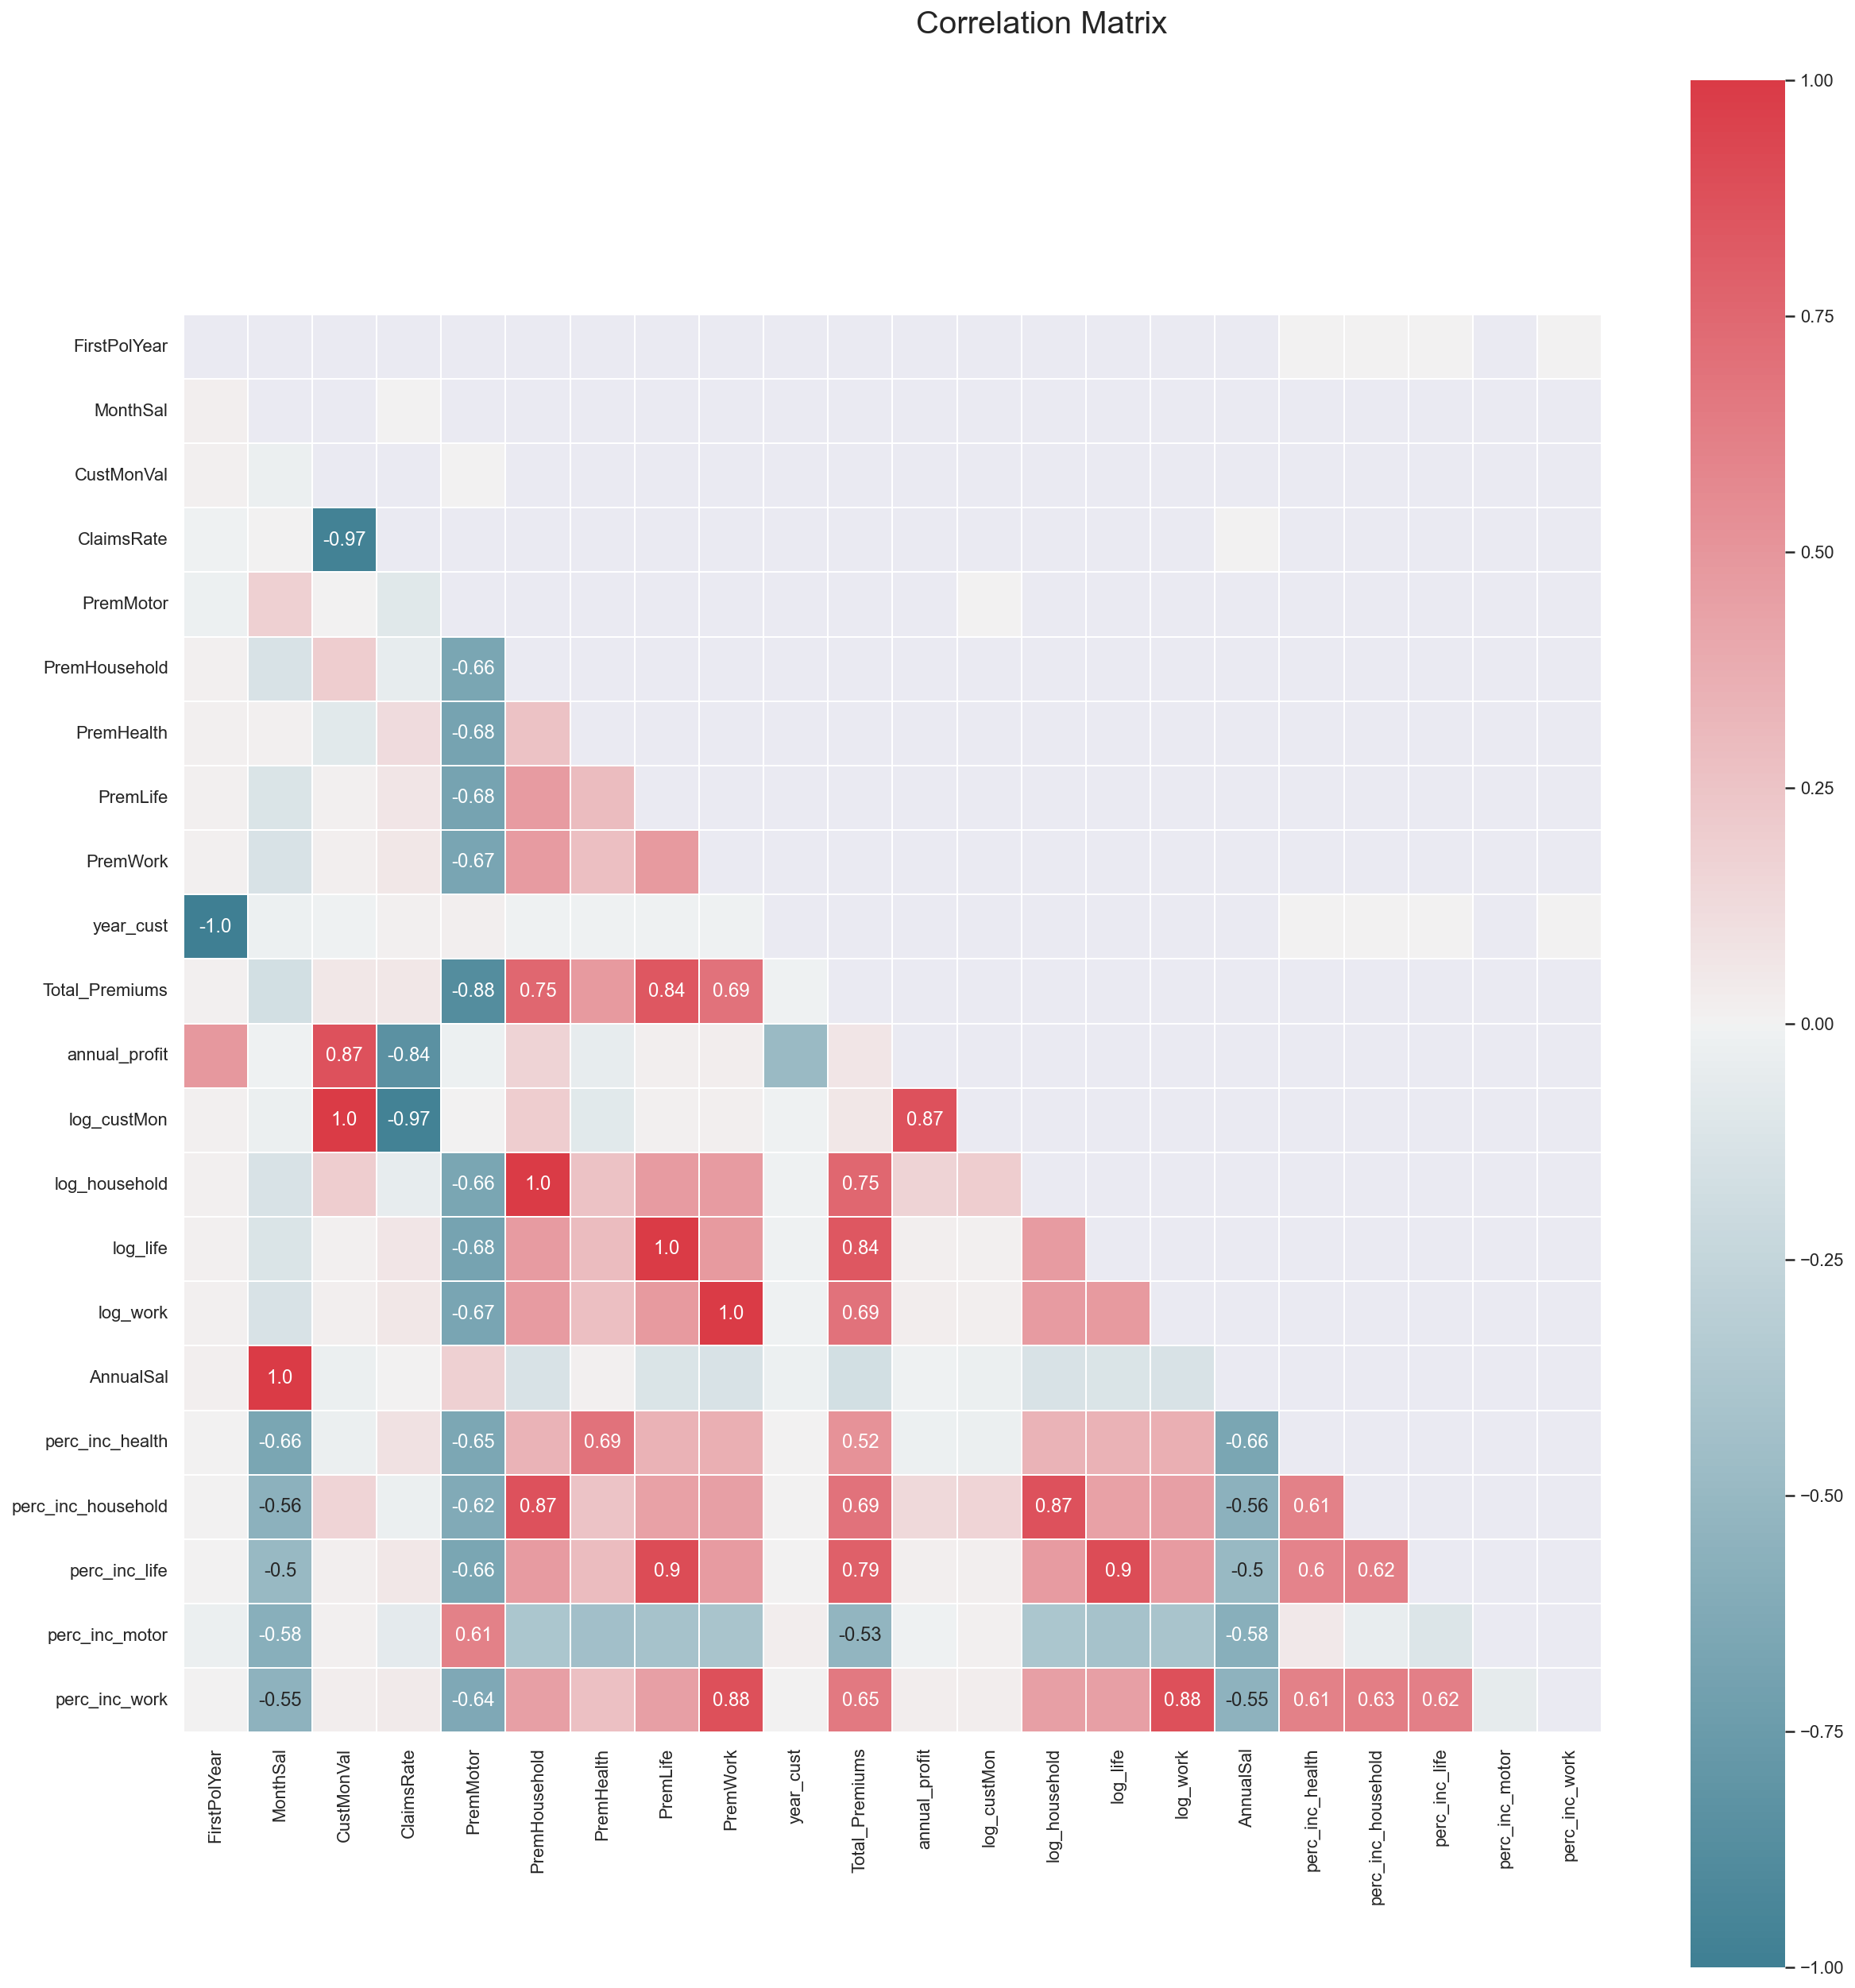

In [126]:
# Prepare figure
fig = plt.figure(figsize=(20, 20))

# Obtain correlation matrix. Round the values to 2 decimal cases.
corr = np.round(data_selection[new_metric_feat].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
matrix = np.triu(corr)

sns.heatmap(data=corr, annot=annot, mask=matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

### Correlation between binary and continuous variables

In [127]:
data_corr = data_selection.copy()

In [128]:
data_corr.columns

Index(['FirstPolYear', 'MonthSal', 'EducDeg_ord', 'GeoLivArea', 'Children',
       'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth',
       'PremLife', 'PremWork', 'year_cust', 'Total_Premiums', 'annual_profit',
       'log_custMon', 'log_household', 'log_life', 'log_work', 'AnnualSal',
       'perc_inc_health', 'perc_inc_household', 'perc_inc_life',
       'perc_inc_motor', 'perc_inc_work'],
      dtype='object')

In [129]:
new_metric_feat=['Total_Premiums', 'log_custMon','log_health', 'log_household', 'log_life', 'log_work', 'AnnualSal',
                 'perc_inc_health', 'perc_inc_household']

KeyboardInterrupt: 

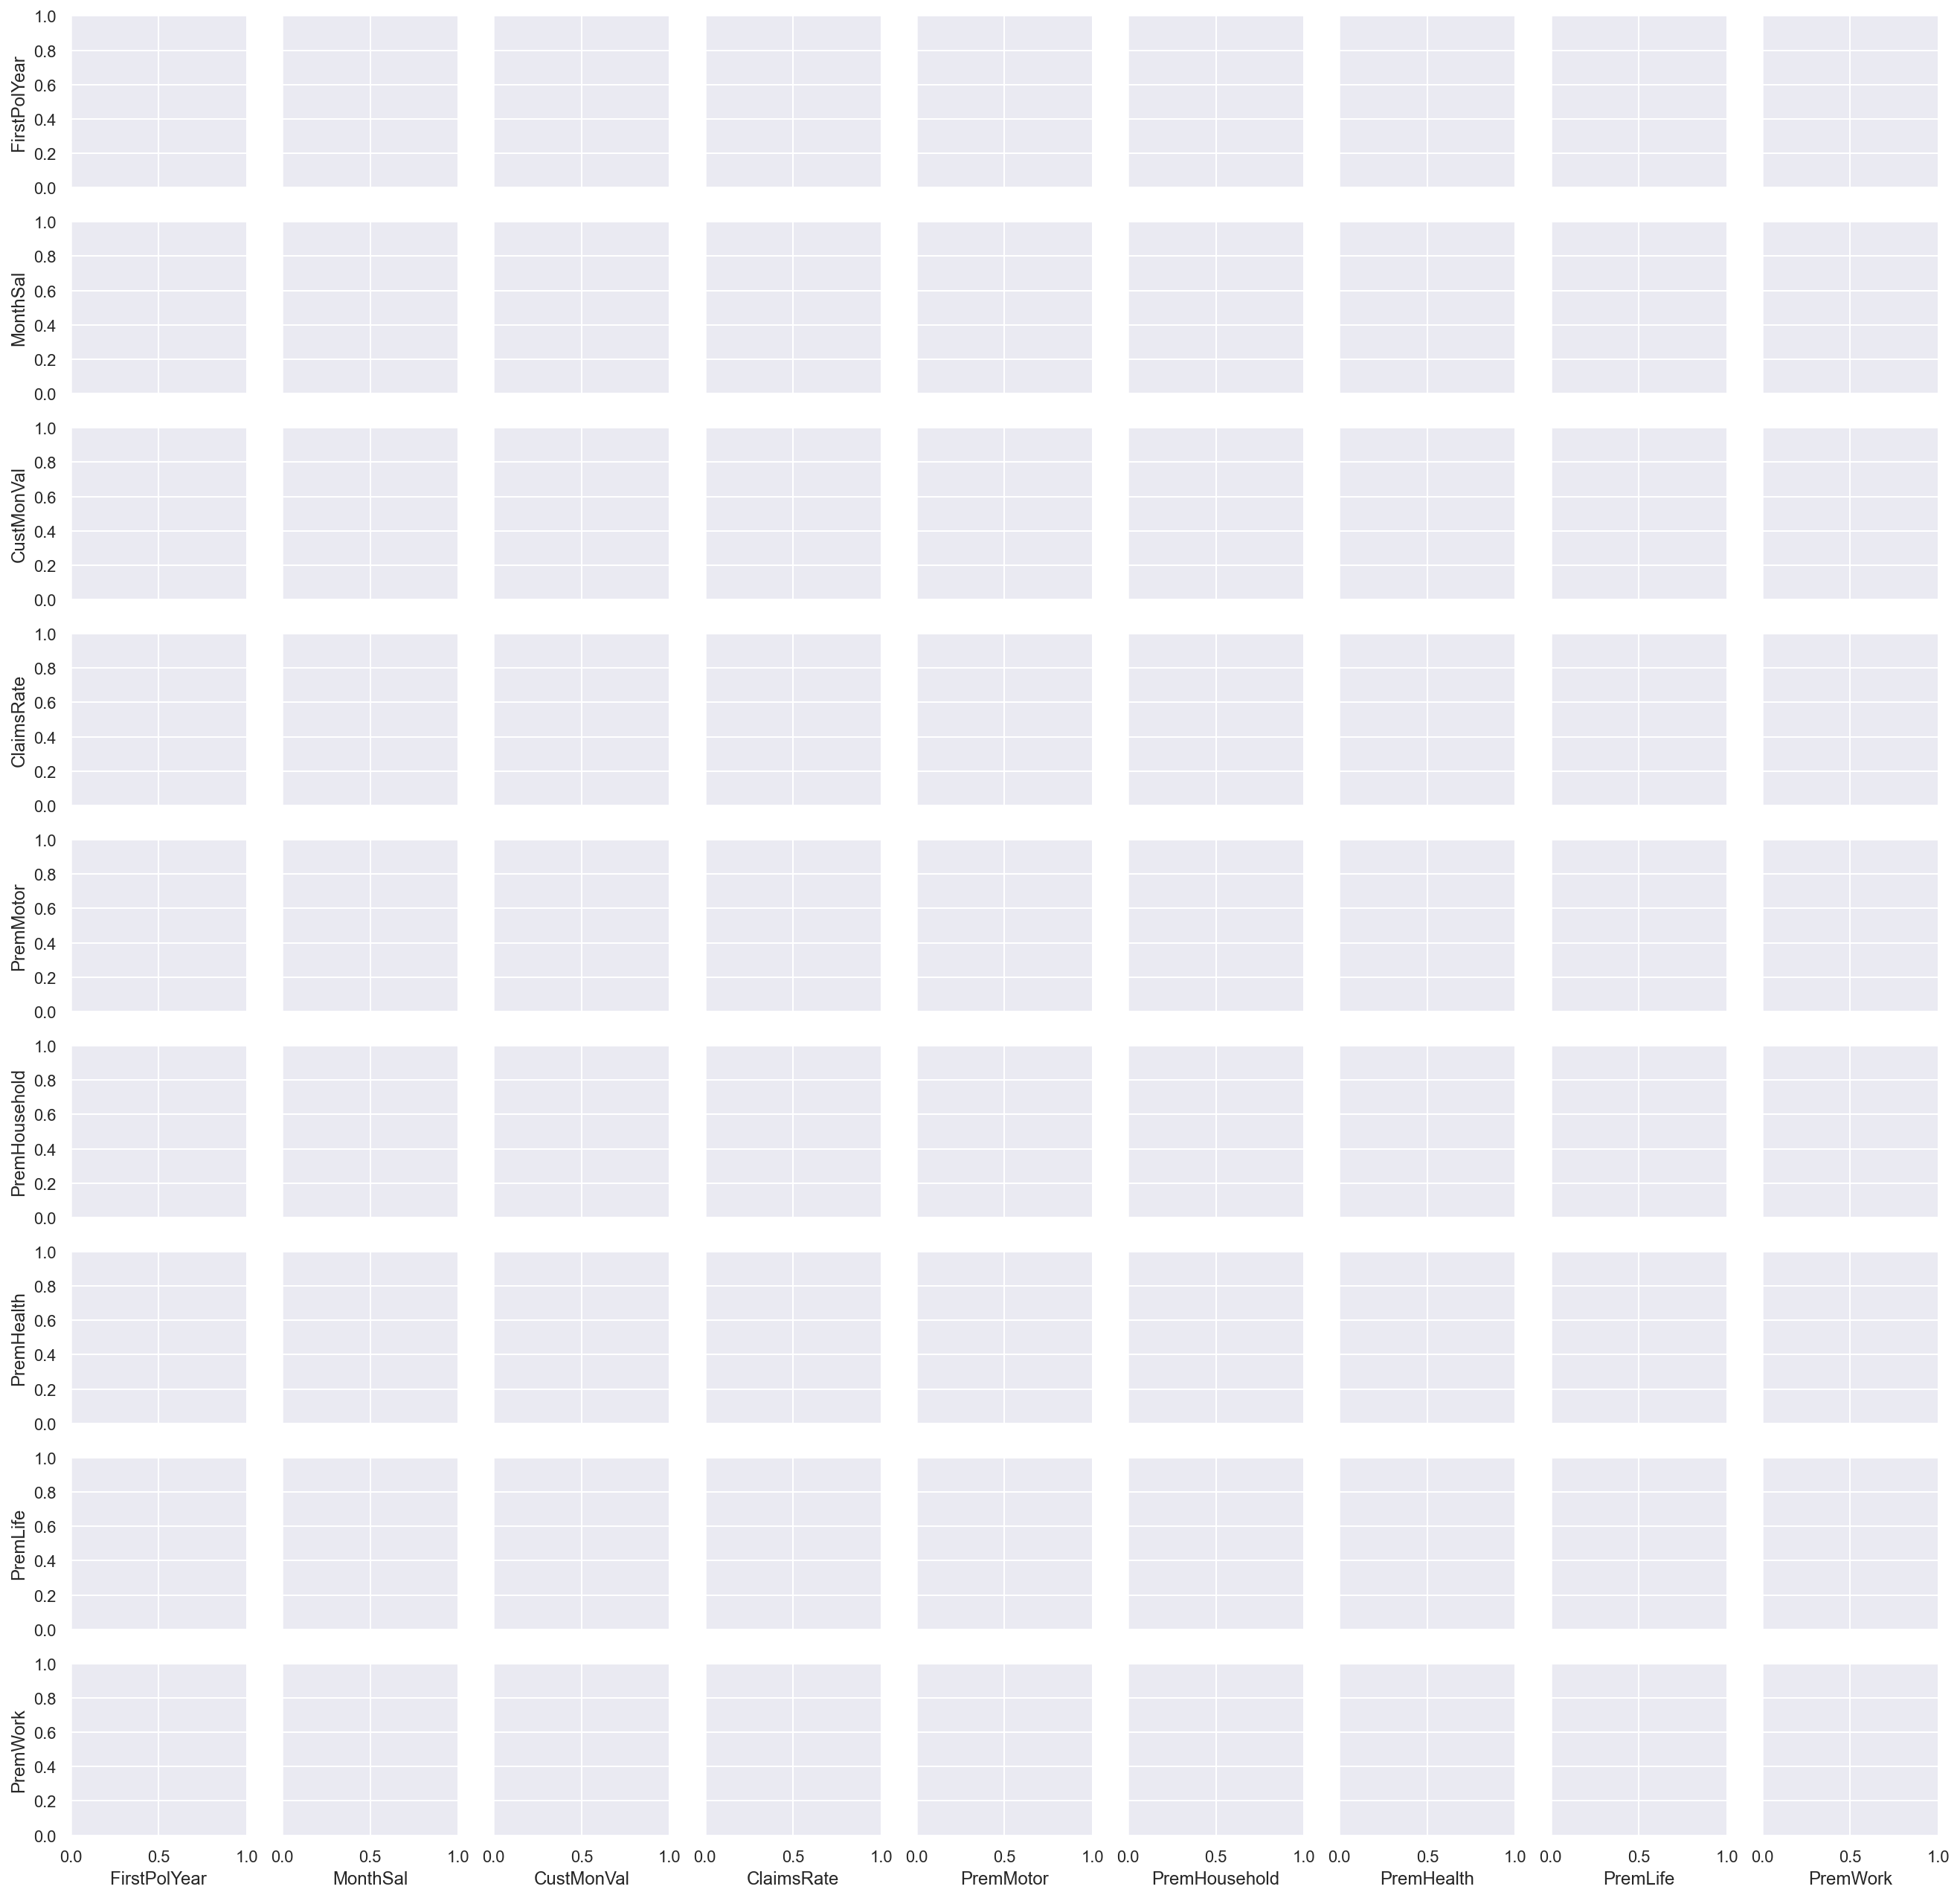

In [130]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data_corr[metric_features + ['Children']], diag_kind="hist", hue='Children')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [159]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="darkseagreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="darkseagreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

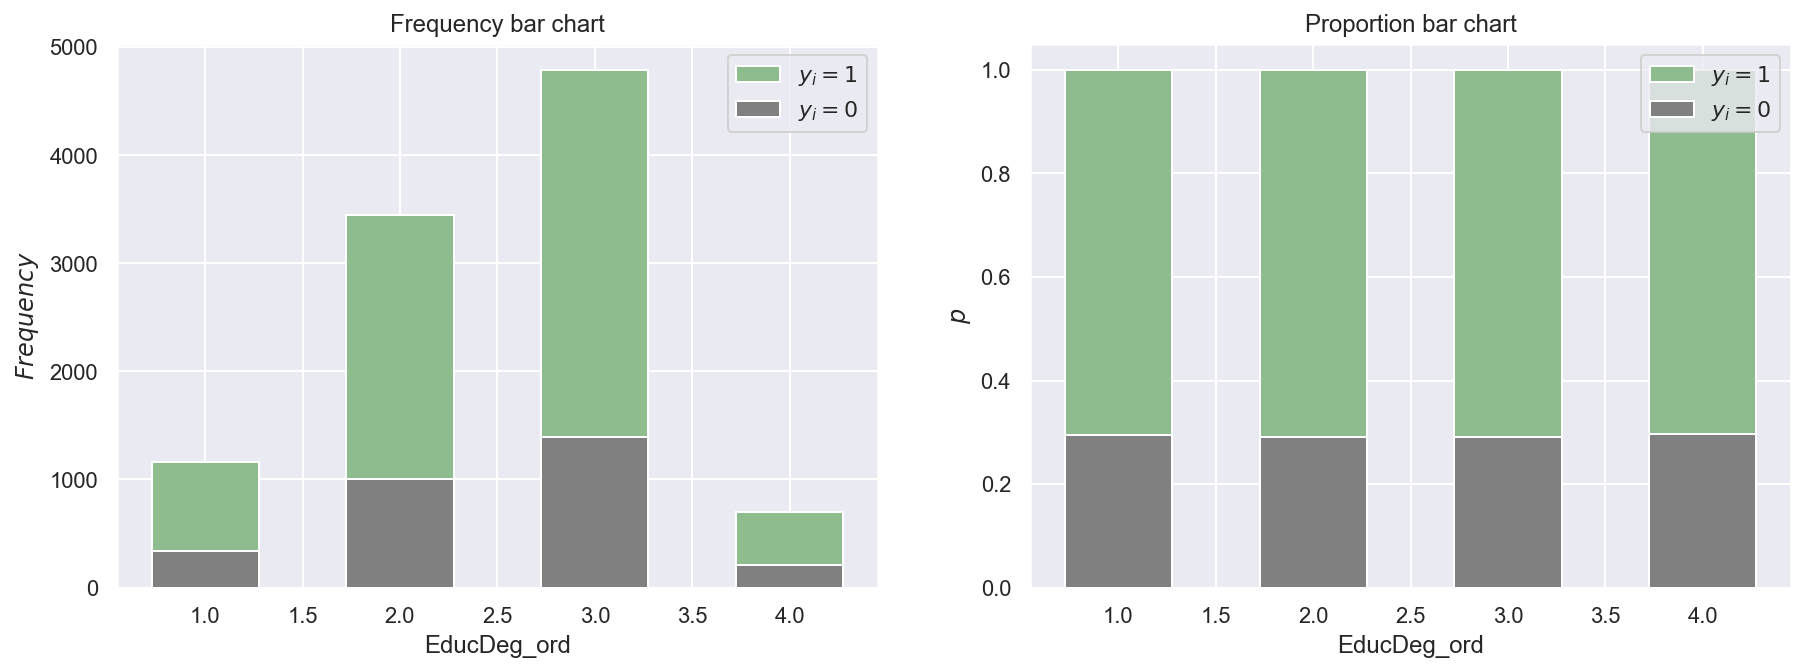

In [160]:
bar_charts_categorical(data_corr, "EducDeg_ord","Children")

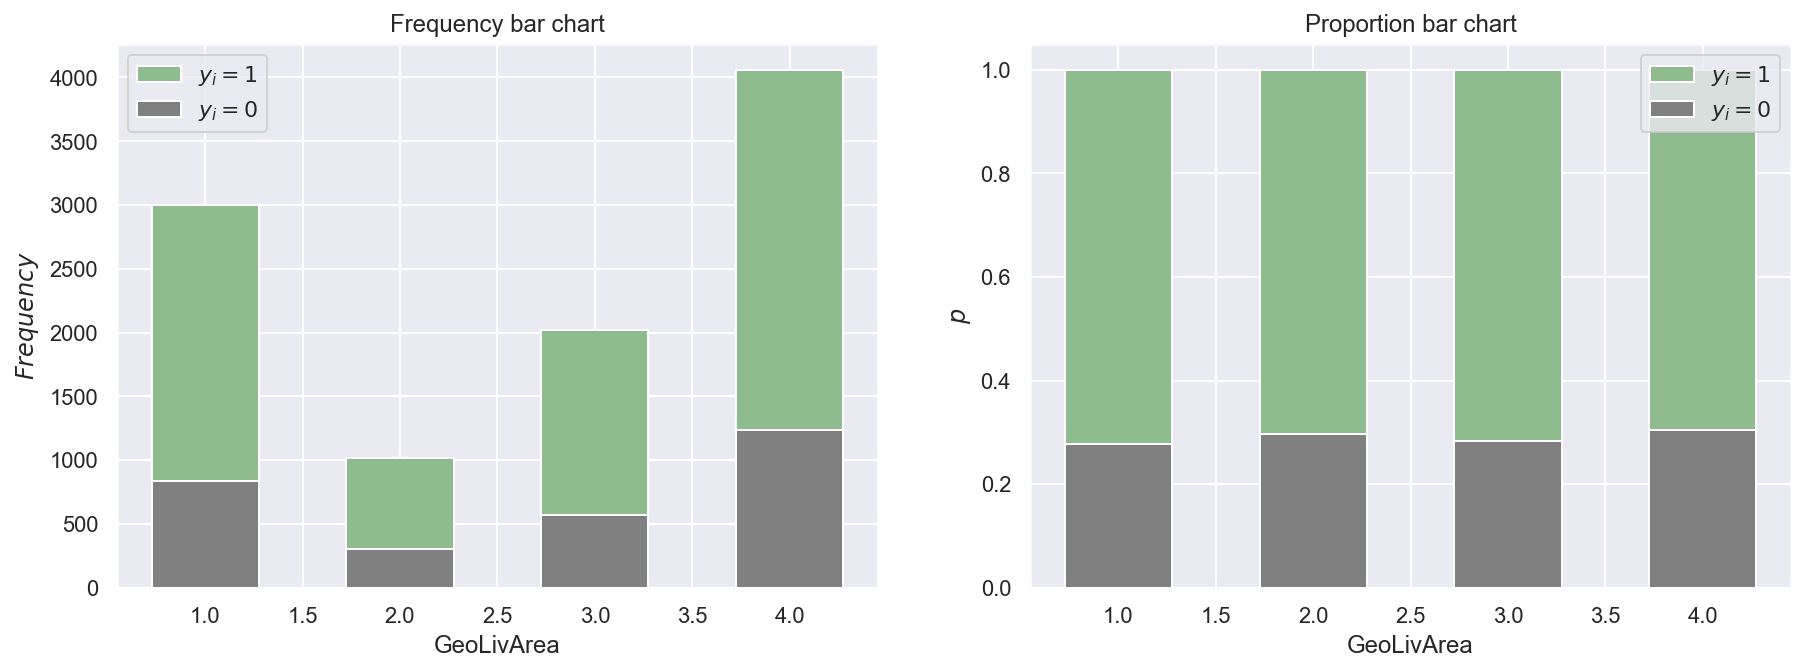

In [161]:
bar_charts_categorical(data_corr, "GeoLivArea", "Children")


<a class="anchor" id="prototypes">

## 3.1 K-prototypes
    
</a>

In [152]:
data_prot=data_corr[['Children', 'EducDeg_ord', 'MonthSal']]
categorical_columns = [0, 1]

In [153]:
# data_prot['Cluster'] = kproto.labels_
# data_prot['Cluster'] = data_prot['Cluster'].apply(pd.to_numeric)

In [154]:
# cen = kproto.cluster_centroids_
# centroids = pd.DataFrame(index=range(0,20))
# centroids['MonthSal']=pd.DataFrame(cen[:,0])
# centroids['Children']=pd.DataFrame(cen[:,1])
# centroids['EducDeg_ord']=pd.DataFrame(cen[:,2])

In [155]:
#cen.reshape(20,3).shape

In [125]:
cost_elbow = []
for n_clus in range(1,11):  # iterate over desired ncluster range
    kproto = KPrototypes(n_clusters= n_clus, init='Huang',n_jobs = 1)
    clusters = kproto.fit_predict(data_prot, categorical=categorical_columns)
    cost_elbow.append(kproto.cost_)  # save the inertia of the given cluster solution

In [126]:
cost_elbow

[1292.7759712392476,
 859.4161429998082,
 571.7371907457828,
 469.6743519024934,
 381.5110087891199,
 319.18704571327356,
 284.6830854514492,
 213.84992321670956,
 215.2047977499192,
 170.63887267164932]

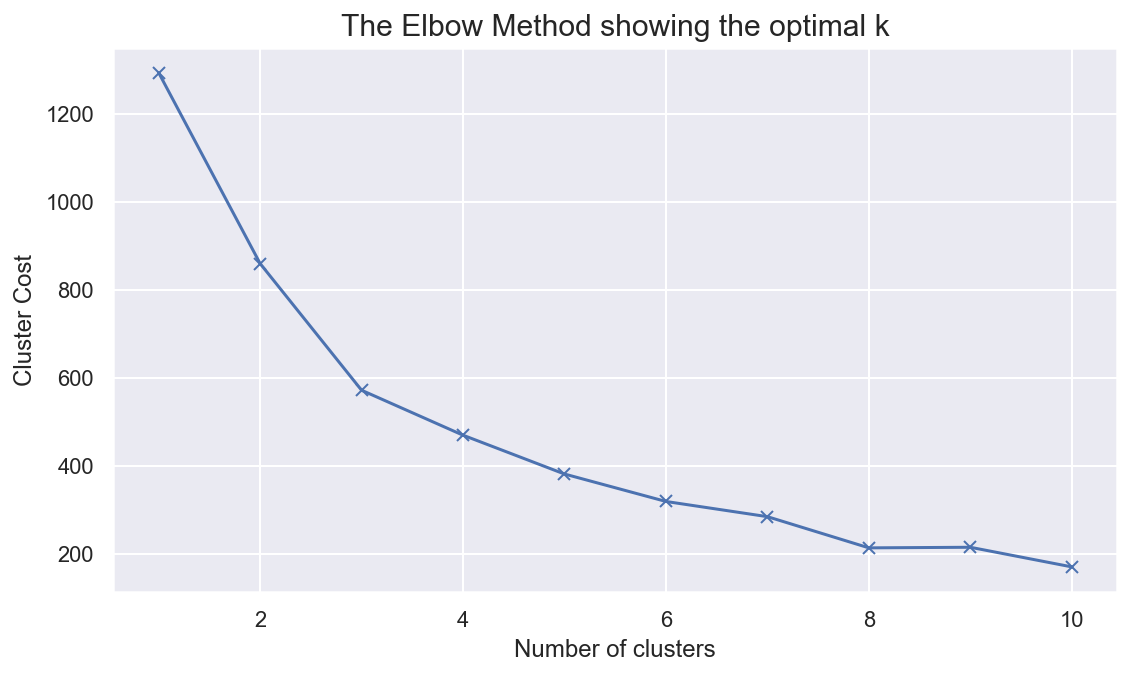

In [127]:
range_K=range(1,11)
plt.figure(figsize=(9,5))
plt.plot(range_K, cost_elbow, 'bx-')
pd.Series(cost_elbow,index=range_K)
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Cost')
plt.title('The Elbow Method showing the optimal k', size=15)
plt.savefig(os.path.join('..\DataMining_project_master.git/figures', 'prototype_elbow'), dpi=200)
plt.show()


In [156]:
kproto_3 = KPrototypes(n_clusters= 3, init='Huang', n_jobs = 1, random_state=42)
clusters_3 = kproto_3.fit_predict(data_prot, categorical=categorical_columns)

pd.Series(clusters_3).value_counts()

0    4015
1    3498
2    2538
dtype: int64

In [157]:
clusters_3_df=pd.DataFrame(clusters_3+1,index=data_prot.index).rename(columns={0:'Cluster Labels'})

In [158]:
clusters_3_df

Cluster Labels
CustID                 
22.0                  2
69.0                  2
139.0                 2
144.0                 1
185.0                 2
...                 ...
8019.0                1
8375.0                2
8420.0                1
9325.0                2
10011.0               3

[10051 rows x 1 columns]

In [159]:
concat_prototype = pd.concat((data_prot, clusters_3_df), axis=1)
concat_prototype.groupby('Cluster Labels').mean()

Children  EducDeg_ord  MonthSal
Cluster Labels                                 
1               0.966625     2.924284  0.433700
2               0.894225     1.947399  0.352366
3               0.047675     2.594957  0.721653

## K-Means and Hierarquical clustering

We're going to start by running K-Means clustering with a lot of clusters and then use the centroids to compute the Hierarquical Clustering

log_household;log_health;log_life;log_work; annual_profit

In [160]:
data_product = data_corr[['log_household', 'PremHealth', 'log_life', 'log_work', 'annual_profit']]
data_product

log_household  PremHealth  log_life  log_work  annual_profit
CustID                                                               
22.0          0.172529    0.229768  0.205971  0.158263       0.136439
69.0          0.236417    0.479268  0.000000  0.105775       0.272778
139.0         0.332238    0.000000  0.280786  0.112697       0.154222
144.0         0.369452    0.499247  0.699660  0.198997       0.188562
185.0         0.291393    0.522979  0.087409  0.202812       0.155301
...                ...         ...       ...       ...            ...
8019.0        0.047743    0.168079  0.040599  0.019619       0.252311
8375.0        0.553906    0.432816  0.325489  0.598359       0.074825
8420.0        0.094967    0.117131  0.041347  0.065645       0.239261
9325.0        0.138734    0.505495  0.150366  0.090198       0.358576
10011.0       0.208357    0.704295  0.446158  0.176241       0.121117

[10051 rows x 5 columns]

In [161]:
data_corr

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
22.0         0.125000  0.591337            2           3         1   
69.0         0.375000  0.233209            2           4         1   
139.0        0.208333  0.482389            2           2         1   
144.0        0.916667  0.141107            3           4         1   
185.0        0.791667  0.456355            2           4         1   
...               ...       ...          ...         ...       ...   
8019.0       0.333333  0.517611            3           2         1   
8375.0       0.791667  0.129293            1           2         1   
8420.0       0.083333  0.558084            3           2         1   
9325.0       0.833333  0.352002            2           2         1   
10011.0      0.750000  0.793262            2           2         0   

         CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  ...  \
CustID                                                                 ...   
22.0       0.283162    0.493827   0.695427       0.127033    0.229768  ...   
69.0       0.479022    0.203704   0.563811       0.178064    0.479268  ...   
139.0      0.303655    0.425926   0.329905       0.258964    0.000000  ...   
144.0      0.200685    0.629630   0.247806       0.291862    0.499247  ...   
185.0      0.190079    0.660494   0.000000       0.223821    0.522979  ...   
...             ...         ...        ...            ...         ...  ...   
8019.0     0.456507    0.098765   0.870287       0.033646    0.168079  ...   
8375.0     0.091581    0.740741   0.096377       0.468055    0.432816  ...   
8420.0     0.509289    0.049383   0.903812       0.068041    0.117131  ...   
9325.0     0.419794    0.234568   0.521905       0.100939    0.505495  ...   
10011.0    0.154685    0.703704   0.301711       0.155372    0.704295  ...   

         log_custMon  log_household  log_life  log_work  AnnualSal  \
CustID                                                               
22.0        0.359703       0.172529  0.205971  0.158263   0.591337   
69.0        0.564643       0.236417  0.000000  0.105775   0.233209   
139.0       0.382562       0.332238  0.280786  0.112697   0.482389   
144.0       0.263858       0.369452  0.699660  0.198997   0.141107   
185.0       0.251058       0.291393  0.087409  0.202812   0.456355   
...              ...            ...       ...       ...        ...   
8019.0      0.542513       0.047743  0.040599  0.019619   0.517611   
8375.0      0.126420       0.553906  0.325489  0.598359   0.129293   
8420.0      0.593870       0.094967  0.041347  0.065645   0.558084   
9325.0      0.505682       0.138734  0.150366  0.090198   0.352002   
10011.0     0.207500       0.208357  0.446158  0.176241   0.793262   

         perc_inc_health  perc_inc_household  perc_inc_life  perc_inc_motor  \
CustID                                                                        
22.0            0.000203            0.000086       0.000076        0.001339   
69.0            0.001072            0.000304       0.000000        0.002753   
139.0           0.000000            0.000214       0.000131        0.000779   
144.0           0.001845            0.000824       0.001303        0.002000   
185.0           0.000598            0.000195       0.000040        0.000000   
...                  ...                 ...            ...             ...   
8019.0          0.000169            0.000026       0.000016        0.001915   
8375.0          0.001745            0.001442       0.000577        0.000849   
8420.0          0.000109            0.000049       0.000015        0.001844   
9325.0          0.000749            0.000114       0.000092        0.001689   
10011.0         0.000463            0.000078       0.000135        0.000433   

         perc_inc_work  
CustID                  
22.0          0.000161  
69.0          0.000268  
139.0         0.000138  
144.0         0.000

In [162]:
data_selection.isna().sum()

FirstPolYear          0
MonthSal              0
EducDeg_ord           0
GeoLivArea            0
Children              0
CustMonVal            0
ClaimsRate            0
PremMotor             0
PremHousehold         0
PremHealth            0
PremLife              0
PremWork              0
year_cust             0
Total_Premiums        0
annual_profit         0
log_custMon           0
log_household         0
log_life              0
log_work              0
AnnualSal             0
perc_inc_health       0
perc_inc_household    0
perc_inc_life         0
perc_inc_motor        0
perc_inc_work         0
dtype: int64

In [163]:
k_means_eco = KMeans(n_clusters=50, init='k-means++', n_init=15, random_state=42)
k_means_eco.fit(data_product)

KMeans(n_clusters=50, n_init=15, random_state=42)

In [164]:
labels_product = k_means_eco.predict(data_product)
labels_product

array([39, 10, 39, ..., 44, 48,  2])

In [165]:
concat_df = pd.concat((data_product, pd.DataFrame(labels_product,index = data_product.index).rename(columns = {0:'Cluster Labels'})), axis = 1)
concat_df

log_household  PremHealth  log_life  log_work  annual_profit  \
CustID                                                                  
22.0          0.172529    0.229768  0.205971  0.158263       0.136439   
69.0          0.236417    0.479268  0.000000  0.105775       0.272778   
139.0         0.332238    0.000000  0.280786  0.112697       0.154222   
144.0         0.369452    0.499247  0.699660  0.198997       0.188562   
185.0         0.291393    0.522979  0.087409  0.202812       0.155301   
...                ...         ...       ...       ...            ...   
8019.0        0.047743    0.168079  0.040599  0.019619       0.252311   
8375.0        0.553906    0.432816  0.325489  0.598359       0.074825   
8420.0        0.094967    0.117131  0.041347  0.065645       0.239261   
9325.0        0.138734    0.505495  0.150366  0.090198       0.358576   
10011.0       0.208357    0.704295  0.446158  0.176241       0.121117   

         Cluster Labels  
CustID                   
22.0                 39  
69.0                 10  
139.0                39  
144.0                26  
185.0                24  
...                 ...  
8019.0               44  
8375.0               20  
8420.0               44  
9325.0               48  
10011.0               2  

[10051 rows x 6 columns]

In [166]:
k_means_grouped = concat_df.groupby(by = 'Cluster Labels').mean()
k_means_grouped

log_household  PremHealth  log_life  log_work  annual_profit
Cluster Labels                                                              
0                    0.211536    0.593928  0.535084  0.359956       0.177037
1                    0.095494    0.284452  0.097459  0.089208       0.138028
2                    0.159140    0.672113  0.370743  0.169033       0.175917
3                    0.282268    0.425979  0.229009  0.116387       0.289181
4                    0.442482    0.302870  0.343801  0.232935       0.365773
5                    0.265253    0.387516  0.258896  0.691175       0.195029
6                    0.418058    0.317233  0.841409  0.425302       0.334295
7                    0.105445    0.158067  0.083706  0.070122       0.407619
8                    0.148932    0.613099  0.153688  0.130893       0.181533
9                    0.688611    0.330539  0.540338  0.261807       0.179601
10                   0.259941    0.398623  0.092675  0.153561       0.184500
11                   0.183642    0.259953  0.332369  0.224471       0.216283
12                   0.241987    0.463293  0.454186  0.157114       0.295464
13                   0.477114    0.385308  0.535799  0.465937       0.243690
14                   0.507697    0.551692  0.447531  0.175872       0.260342
15                   0.123535    0.451918  0.129406  0.097722       0.160283
16                   0.592171    0.479597  0.194733  0.202166       0.491032
17                   0.714558    0.306600  0.281631  0.503850       0.546520
18                   0.643445    0.318680  0.878507  0.194255       0.181623
19                   0.387362    0.313338  0.159999  0.308923       0.232091
20                   0.532904    0.455281  0.177343  0.461608       0.267205
21                   0.328114    0.272903  0.597775  0.224473       0.213351
22                   0.128700    0.326235  0.246106  0.106555       0.175994
23                   0.217808    0.596852  0.192645  0.399317       0.177485
24                   0.334322    0.607880  0.119681  0.195936       0.239452
25                   0.089276    0.133431  0.076768  0.062101       0.129614
26                   0.474328    0.486371  0.696028  0.181265       0.187927
27                   0.158573    0.475038  0.291470  0.206081       0.175246
28                   0.240507    0.236987  0.736134  0.737684       0.192750
29                   0.128267    0.433954  0.479912  0.151230       0.173189
30                   0.345973    0.572426  0.322679  0.279935       0.336763
31                   0.218548    0.780615  0.199326  0.150777       0.195206
32                   0.584671    0.237702  0.731805  0.514322       0.189798
33                   0.119032    0.309971  0.105429  0.090453       0.290807
34                   0.169378    0.381344  0.155764  0.317247       0.174336
35                   0.217404    0.390625  0.788282  0.447905       0.163151
36                   0.595825    0.460768  0.206052  0.176007       0.184766
37                   0.311980    0.312790  0.364065  0.113263       0.183420
38                   0.160894    0.354253  0.485235  0.400112       0.203318
39                   0.209552    0.221089  0.147251  0.113142       0.188851
40                   0.368399    0.411142  0.389267  0.304379       0.181245
41                   0.305282    0.574723  0.310985  0.134232       0.182247
42                   0.200190    0.264729  0.196844  0.129040       0.395942
43                   0.293733    0.632254  0.598149  0.154010       0.198749
44                   0.089285    0.151681  0.078832  0.068947       0.261102
45                   0.173733    0.438526  0.818832  0.156145       0.179282
46                   0.502936    0.365756  0.578275  0.207342       0.439898
47                   0.706696    0.250185  0.288552  0.680919       0.219464
48                   0.149685    0.474042  0.142561  0.119087       0.332634
49                   0.724941    0.298071  0.765600  0.274781       0.551477

#### Hierarquical Clustering

In [167]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

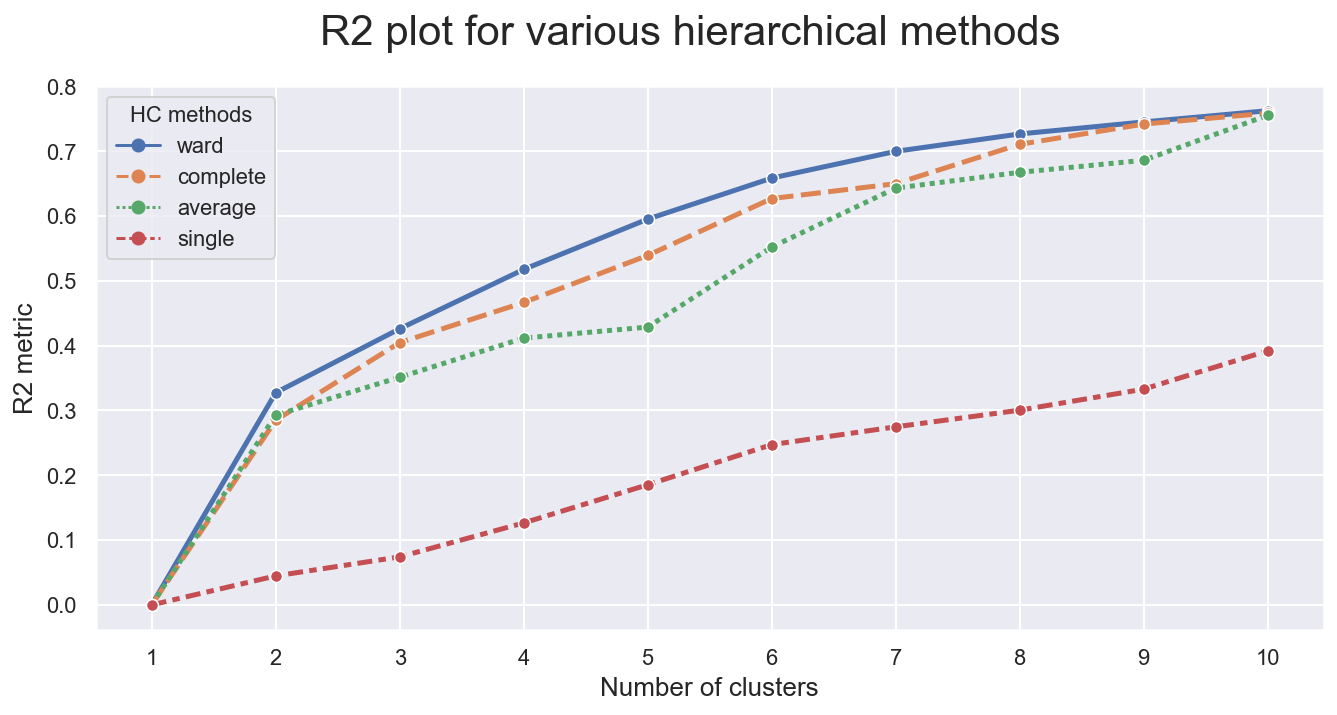

In [168]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=k_means_grouped, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T

r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca()#.invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.savefig(os.path.join('..\DataMining_project_master.git/figures', 'hierarquical_elbow'), dpi=200)
plt.show()

In [169]:
r2_hc_methods

ward  complete   average    single
1   0.000000  0.000000  0.000000  0.000000
2   0.327365  0.284986  0.292688  0.044713
3   0.426038  0.404679  0.351246  0.074089
4   0.517607  0.466603  0.411589  0.126496
5   0.595210  0.539193  0.428650  0.185383
6   0.658478  0.626906  0.552086  0.247244
7   0.699776  0.649909  0.643040  0.274721
8   0.726591  0.710617  0.667418  0.300421
9   0.745144  0.741828  0.685971  0.332879
10  0.762472  0.758714  0.755408  0.391996

In [170]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(k_means_grouped)

array([34, 48, 41, 45, 32, 43, 29, 40, 42, 47, 23, 44, 21, 25, 31, 36, 37,
       35, 26, 33, 49, 28, 38, 30, 17, 24, 39, 19, 11, 27, 16, 14, 12, 46,
       22,  5, 15, 18, 13, 10,  7, 20,  6,  9,  8,  2,  4,  3,  1,  0],
      dtype=int64)

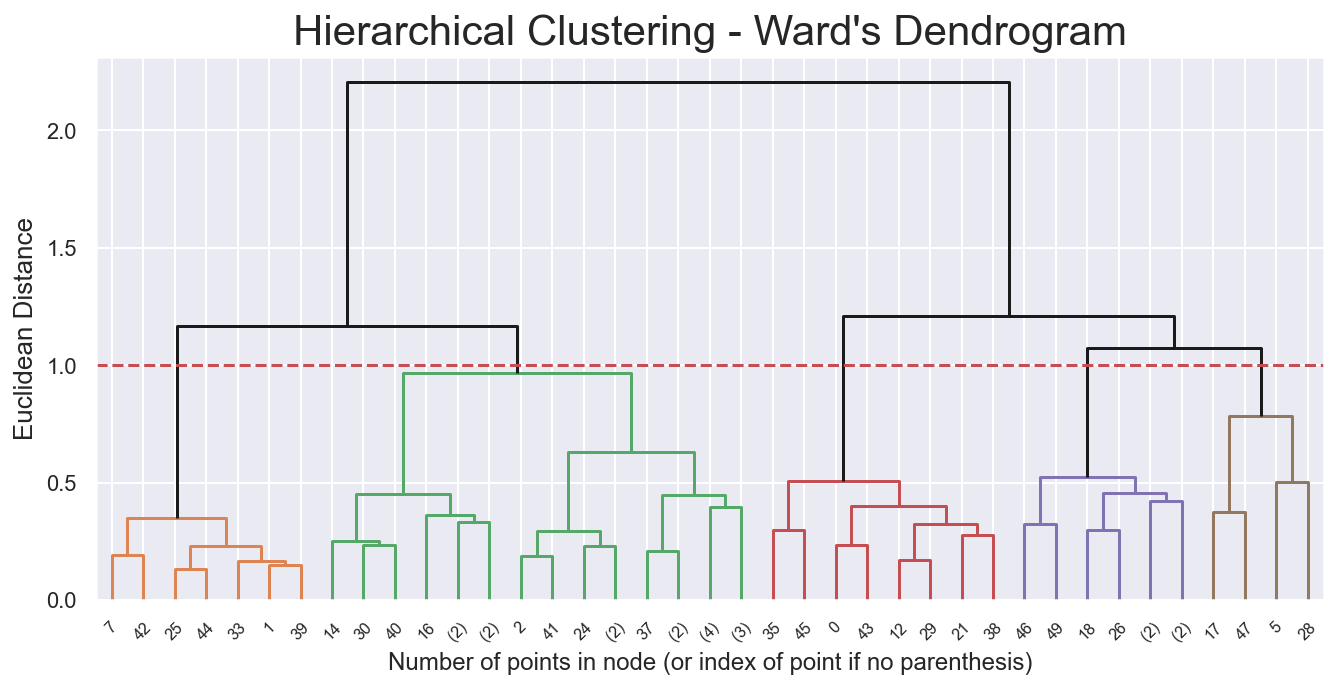

In [171]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 1
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.savefig(os.path.join('..\DataMining_project_master.git/figures', 'dendogram_hierarquical'), dpi=200)
plt.show()

In [178]:
linkage = 'ward'
distance = 'euclidean'
num_clust = 3

final_hclust = AgglomerativeClustering(affinity = distance, linkage = linkage, n_clusters = num_clust)
final_hc_labels = final_hclust.fit_predict(k_means_grouped)

final_df = pd.concat((data_product, pd.Series(final_hc_labels, name = 'labels')), axis = 1)
final_df.groupby('labels').mean()

log_household  PremHealth  log_life  log_work  annual_profit
labels                                                              
0.0          0.215533    0.403441  0.307972  0.180769       0.186413
1.0          0.242215    0.351044  0.268894  0.147593       0.173296
2.0          0.198480    0.417290  0.133981  0.152833       0.279650

## Density-Based Spatial Clustering of Applications with Noise

#### Without K-Means

#### With K-Means

In [212]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(k_means_grouped)
distances, indices = nbrs.kneighbors(k_means_grouped)

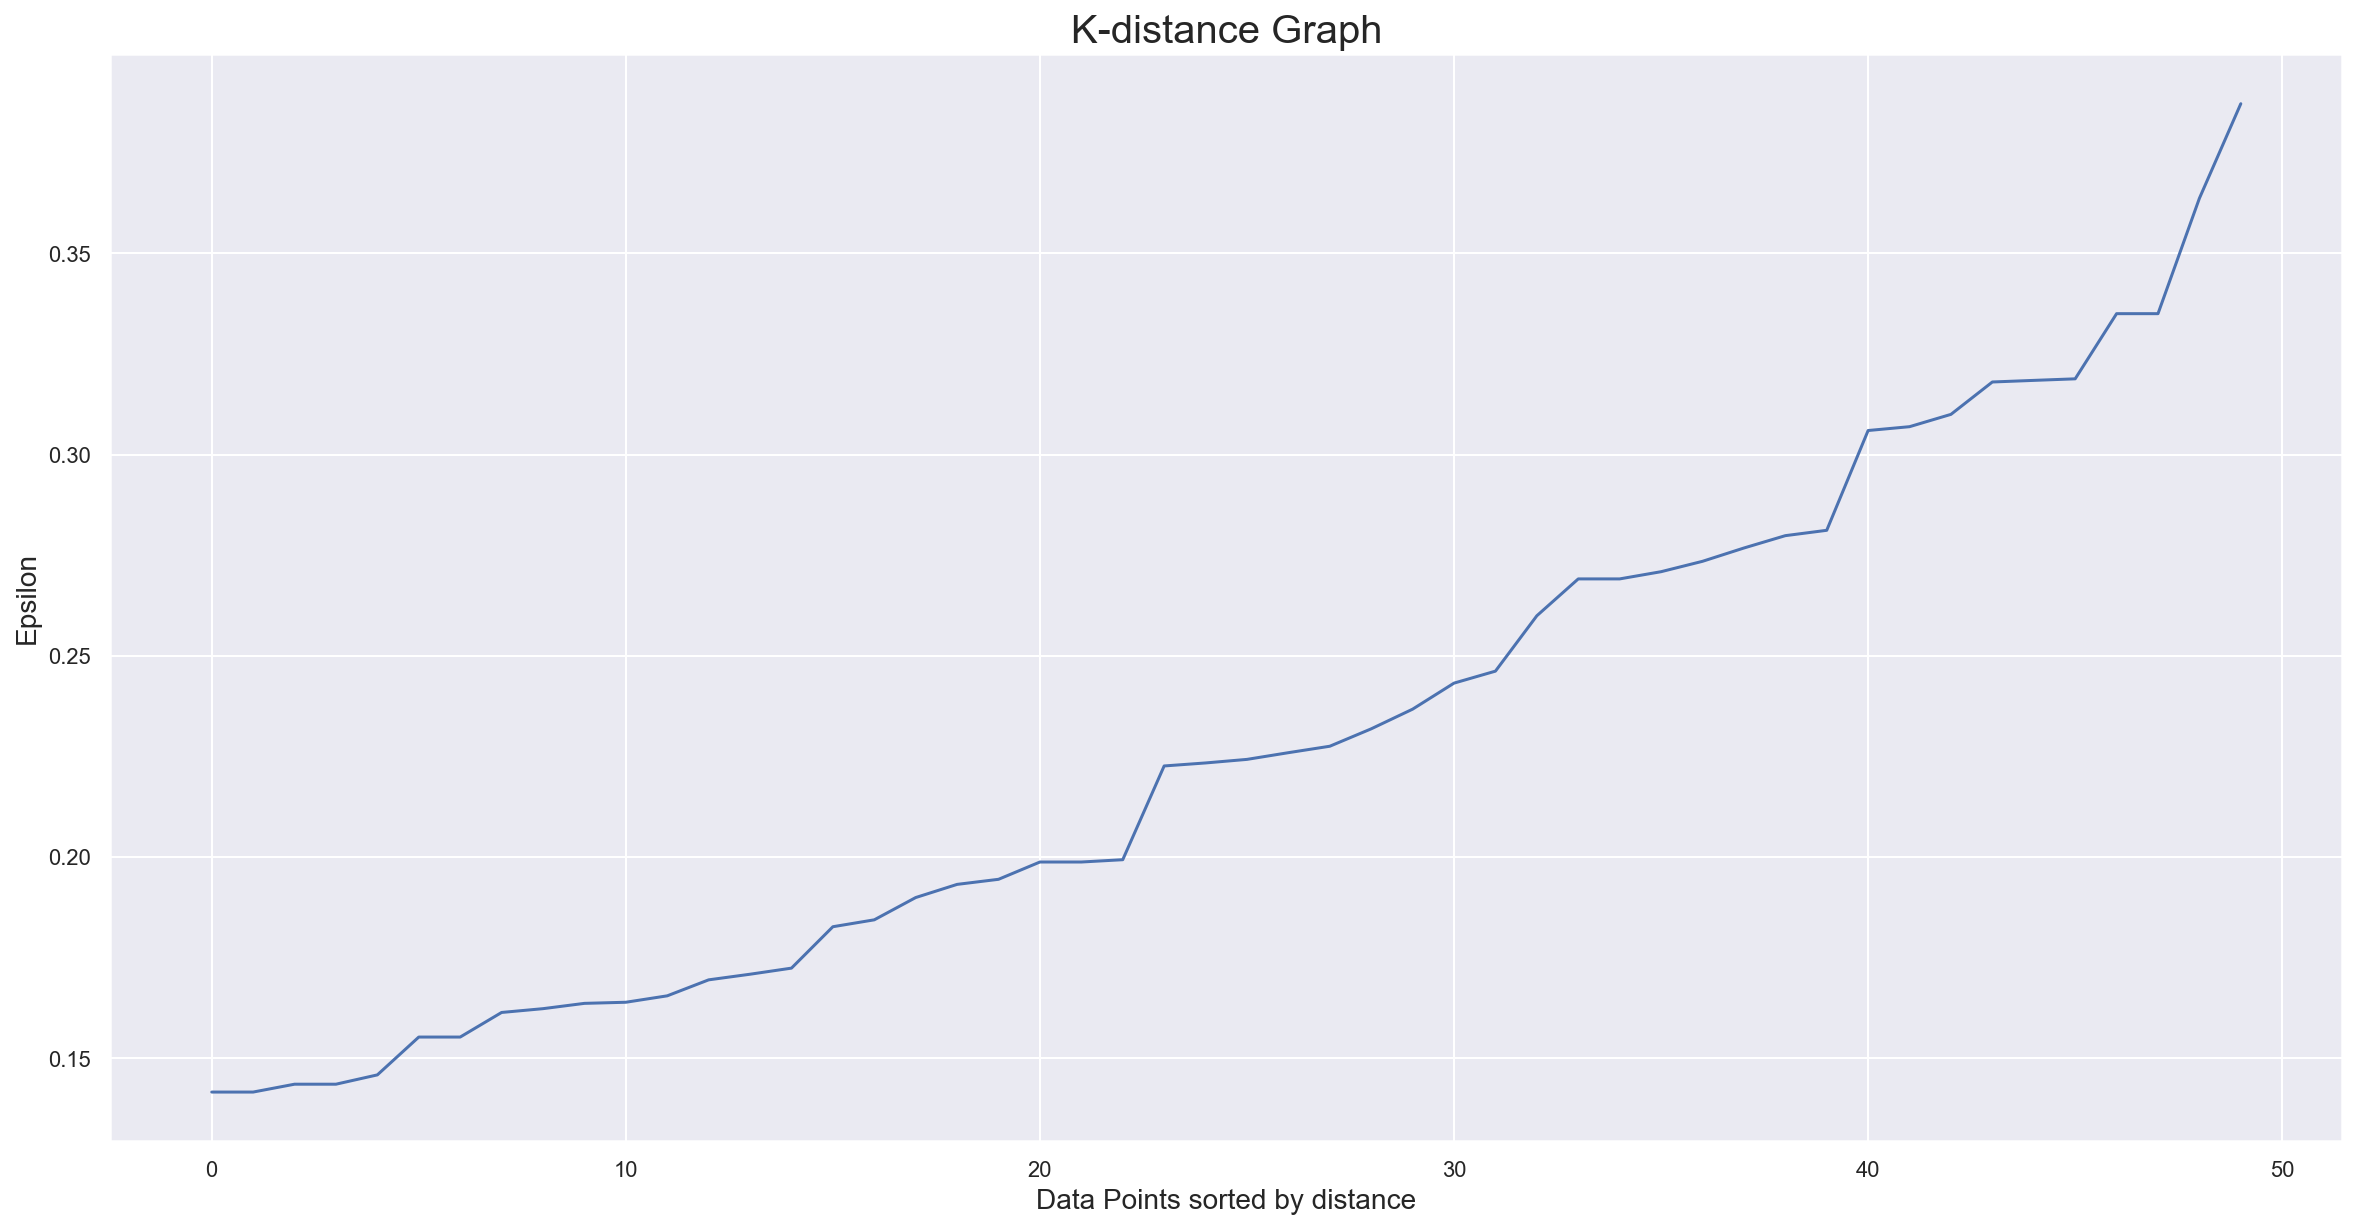

In [213]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [214]:
dbscan_opt = DBSCAN(eps = 0.27, min_samples = 2)
dbscan_opt.fit(k_means_grouped)

DBSCAN(eps=0.27, min_samples=2)

In [215]:
kmeans_grouped_dbscan = k_means_grouped.copy()
kmeans_grouped_dbscan['DBSCAN_opt_labels'] = dbscan_opt.labels_
kmeans_grouped_dbscan['DBSCAN_opt_labels'].value_counts()

 0    33
-1    15
 1     2
Name: DBSCAN_opt_labels, dtype: int64

# Mean-shift clustering

In [288]:
# def get_ss(df):
#     """Computes the sum of squares for all variables given a dataset
#     """
#     ss = np.sum(df.var() * (df.count() - 1))
#     return ss  # return sum of sum of squares of each df variable

In [289]:
# bandwidth = estimate_bandwidth(data_economic, quantile=0.06, random_state=1, n_jobs=-1)
# bandwidth

In [290]:
# # Perform mean-shift clustering with bandwidth set using estimate_bandwidth
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
# ms_labels = ms.fit_predict(data_economic)

# ms_n_clusters = len(np.unique(ms_labels))
# print("Number of estimated clusters : %d" % ms_n_clusters)

In [291]:
# Counter(ms_labels)

In [292]:
# # Concatenating the labels to df
# df_concat = pd.concat([data_economic, pd.Series(ms_labels, index=data_economic.index, name="ms_labels")], axis=1)
# df_concat.head()

In [293]:
# # Computing the R^2 of the cluster solution
# sst = get_ss(data_economic)  # get total sum of squares
# ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
# ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
# r2 = ssb / sst
# print("Cluster solution with R^2 of %0.4f" % r2)